# Report Feedback



Good abstract, although lacking a scientific aim. Introduction needed to identify the science problem (e.g., you want to understand the star formation history of the Milky Way, and globular clusters are an important tracer of that history, and CMDs can be used to understand open clsuters, but you need to to identify clusters and their stellar members to be able to do this). Also need to state the aims and how they help to address the science problem.

Data section: Described where the data come from, and some effort made to describe cuts. But, needed to describe ALL cuts (incl. S/N cuts) and also describe why cuts were made.

Methods and Results: Need to describe the interesting parts of the Figures. E.g., what, specificaly, should I be looking at in Figs 1 & 2? Decription of methods overall pretty good, although writing is not always clear and concise, nor formal as migfht be expected in a publication (you will never see the phrase "as we learned in the Lectures" in a published paper! How were the stars assigned to the clusters? Did you perfrom the final refinement of the membership in restricted distance ranges around the three clusters, and including r_est in the GMM fit? 

Discussion and Conclusion: okay job of comparing results, but did nbot attempt to describe what do the differences in the CMDs observed between the three clusters, and also with the field mean. The two clusters NGC2451A & B have their uppr-main sequence in tact -- the more massive stars have not yet evolved off the main sequence qnd onto the RGB, which is well populated in NGC2477. This means that NGC2451A & B are relatively young, while NGC2477 is much older. Similarly, the field star main sequence is thicker, and also contains an RGB. The field stars represent the disk, which has an extende star formation history, with roughly constant SF over the last 8-10 Gyrs. Cluasters on the other hand have stars all formed from the same material at the same time, so have much more well-defined MS.

# ASTR3110 Computer Laboratory 2: Determining star cluster membership with Gaia data and Gaussian Mixuture Modelling.


In this lab, you will again make use of data from the Gaia Data Release 2 (Gaia DR2). This time you will use the position (R.A., decl.), proper motions (pmRA, pmdec), and distance measurements from Gaia to identify open clusters using Gaussian Mixture Modelling (GMM). You will also identify which stars in the data are most likely gravitationally bound members of the clusters. By identifying which stars in a region of sky belong to different star clusters, it is possible to investigate the properties of the open clusters such as their kinematics, stellar populations etc. 

$\textbf{In the first part of the lab, you will download and then get to know your data, eliminating spurious data points using the techniques you learned in Lab 1,}$ as well as performing task-specific filtering of the data. Then, you will explore the data by producing a series of plots that will help you better understand the data, and will also guide your decision making for future analysis.

$\textbf{In the second part of the lab, you will begin to use the [scikit learn GMM package]}$(https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to identify star clusters in the data. This will require an amount of experimentation, which will help you to become familiar with using the GMM. You will refine your analysis to a point where you can isolate the clusters in the data and use the GMM fits to determine the stars with the greatest likelihood of being gravtitationally bound members of those clusters.

Finally, you will plot separate colour-magnitude diagrams for the clusters you have found in the data.

At the completion of this lab, you will have acquired (or improved) the following skills:
- Data filtering using Pandas.
- Manipulating data to derive required parameters.
- Plotting data and interpreting plots using matplotlib and seaborn.
- Using scikit learn Gaussian Mixture Modelling.

This Lab is to be submitted as a publication-style report (details will appear on iLearn later), which will be worth 25\% of your final grade. You should also submit your notebook alongside your report. In completing your notebook, keep in mind the following pointers for good coding practice, and will also help when it is time to write your report, where you will be expected to explain what you have done during your analysis, and interpret results.
- Comments: Your code should always be commented. You can either do this by adding explanation text placed in blocks just before code blocks OR as comments within the code blocks themselves. Your comments should demonstrate that you understand what your code is doing, and why! 
- Plots should be well presented and explained: E.g., reasonable axes (e.g., ranges should be set so that trends are clearly visible), clear axis labels. You should be able to explain the "why" and "what" of your plots. Why are you plotting this? What does your plot show?
- Formatting of your code (easy to understand, sensible variable names etc.)
- Explanations and/or justification for cuts made on the data.
- Comments/answers to any questions posed in the notebooks as well as comments on interpretation/comparison of results. 

# Part 1: Obtaining the data and applying filters

In this part, we will retrieve the Gaia data from the archive, and weed out obviously bad data.

## Downloading the data



The data for this practical comes from the [Gaia](https://www.cosmos.esa.int/web/gaia/) mission and must be downloaded from the online Gaia archive at [http://gea.esac.esa.int/archive/](http://gea.esac.esa.int/archive/). The tabular data is retrieved from the database via an astronomy data query language (ADQL) statement:

```
SELECT source_id, dist.r_est, dist.r_lo, dist.r_hi, dist.r_len, dist.result_flag, dist.modality_flag, src.ra, src.dec, src.L, src.B, src.parallax, src.parallax_error, src.pmra, src.pmra_error, src.pmdec, src.pmdec_error, src.radial_velocity, src.radial_velocity_error, src.astrometric_chi2_al, src.astrometric_n_good_obs_al, src.phot_g_mean_mag, src.phot_bp_mean_mag,src.phot_rp_mean_mag, src.phot_g_mean_flux, src.phot_bp_mean_flux, src.phot_rp_mean_flux, src.phot_g_mean_flux_error, src.phot_bp_mean_flux_error, src.phot_rp_mean_flux_error, src.phot_bp_rp_excess_factor 
FROM external.gaiadr2_geometric_distance as dist 
JOIN gaiadr2.gaia_source AS src USING (source_id) 
where CONTAINS(POINT('icrs', src.ra, src.dec), CIRCLE('icrs',116.3500,-37.9500,2))=1
```

This query selects multiple columns from the gaia_source and gaiadr2_geometric tables in the archive that are merged using a common ```source_id``` column. The selected data are constrained to a one degree region centred at R.A.=116.35 degrees, decl. = -37.95 degrees. This is centred on the cluster NGC2451, which was discovered in the 1600s and was subject to much debate surrounding whether the stars in this region contained one cluster, or was the superposition of two clusters seen in projected but separated along the line of sight. In this field, there is also the NGC2477 cluster. Your job is to find all of the clusters in this dataset and identify which stars are most likely to be members of these clusters.

Follow the procedure from Lab 1 to obtain the data and read it in as a Pandas data frame.


In [1]:
# Start by importing necessary Python modules
from astropy.io.votable import parse
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd gdrive/MyDrive/ASTR3110/OLD/Prac02

/content/gdrive/MyDrive/ASTR3110/OLD/Prac02


In [5]:
# Extracting the files from the .zip file obtained from the Gaia Archive.
!gunzip lab2Data.vot.gz

***From the first lab, this function reads in the data downloaded from the Gaia Archive and reads them into a Pandas dataframe.***

In [6]:
# Define a function to read a VOTable and return a DataFrame
def votable_to_pandas(voTabFileName, indx=0):
    """
    Reads a VOTable file and returns a Pandas dataframe.
    Reads only one sub-table, specified by the indx argument.
    """
    
    # Parse the VOTable into a table tree & convert 1st sub-table to an AstroPy table
    voTabTree = parse(voTabFileName)
    apTab = voTabTree.get_table_by_index(indx).to_table(use_names_over_ids=True)
    
    return apTab.to_pandas()

In [9]:
# Using the function above to read in the data from the Gaia Archive:
gaiaDF = votable_to_pandas('lab2Data.vot')

In [10]:
# Exploring the columns in the dataframe:
gaiaDF

source_id        r_est         r_lo         r_hi  \
0       5538883287711595904  2886.553594  1372.055759  6031.477380   
1       5538871330521851008  3272.107580  1428.261065  6501.023613   
2       5538870879547981312  5230.780777  3619.070857  7995.678470   
3       5538870226712812672  1534.891982  1448.489537  1632.032831   
4       5538872189519541248  2680.245449  2536.819416  2840.476852   
...                     ...          ...          ...          ...   
857138  5537162620732457216  2630.849870  1499.255285  5179.352144   
857139  5537167259298999168  5519.855512  3943.257204  8082.264164   
857140  5537158355825778176  2797.445040  1265.516676  5634.483640   
857141  5537150727963982080  4245.530547  2740.562022  6930.031470   
857142  5537162685153121664  4056.193936  2269.607474  6974.080101   

              r_len  result_flag  modality_flag          ra        dec  \
0       1750.123414            1              1  117.904216 -38.432301   
1       1754.115142            1              1  118.146361 -38.448006   
2       1752.710453            1              1  118.057348 -38.437502   
3       1753.772888            1              1  118.022089 -38.505155   
4       1752.595628            1              1  118.184956 -38.376708   
...             ...          ...            ...         ...        ...   
857138  1564.939485            1              1  115.045194 -39.138268   
857139  1592.966980            1              1  115.299297 -39.023131   
857140  1571.654640            1              1  115.148013 -39.213554   
857141  1598.376121            1              1  115.422220 -39.180930   
857142  1568.522886            1              1  115.075121 -39.119854   

                 l  ...  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
0       253.423979  ...        19.991320               NaN               NaN   
1       253.533785  ...        20.170897               NaN               NaN   
2       253.489277  ...        17.855967         18.374075         17.105984   
3       253.533987  ...        15.616741         16.072763         14.963283   
4       253.487343  ...        14.441201         15.380155         13.482847   
...            ...  ...              ...               ...               ...   
857138  252.942832  ...        19.327406         20.057512         18.530638   
857139  252.936003  ...        17.409716         18.018219         16.680775   
857140  253.048104  ...        20.268995         21.012812         19.466709   
857141  253.122005  ...        18.438543         19.072681         17.638929   
857142  252.937678  ...        20.109446         20.444736         19.412430   

        phot_g_mean_flux  phot_bp_mean_flux  phot_rp_mean_flux  \
0             190.028409                NaN                NaN   
1             161.059988                NaN                NaN   
2            1358.186724         617.909945        1154.448169   
3           10681.932545        5145.760260        8307.209138   
4           31540.302439        9738.526945       32480.967877   
...                  ...                ...                ...   
857138        350.254637         131.084120         310.822885   
857139       2048.614085         857.565782        1707.881531   
857140        147.145982          54.378929         131.245507   
857141        794.198253         324.700028         706.636326   
857142        170.438756          91.761616         137.973597   

        phot_g_mean_flux_error  phot_bp_mean_flux_error  \
0                     1.220120                      NaN   
1                     1.079605                      NaN   
2                     1.597495                 7.576143   
3                     5.183404                18.782531   
4                     9.513970                21.468951   
...                        ...                      ...   
857138                1.009527                 9.362762   
857139                2.277378                 7.186409   
857

## Inspecting the data 


In the below tab, explore your data frame using Pandas functions. Again, the meanings of the column names and the units of the data can be found in the [GAIA data model documentation](http://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/) or viewed as hover help text on the sidebar of the GAIA query page. As in Lab 1 (and for all research), an important part of both data science and astro research is *understanding* the data you are using. Using the information at the Gaia webpage, make a new markdown cell where you list each column in the DataFrame, along with a short description of the data contained in the column of interest (be sure to note units in your description). Some of the columns should be familiar from Lab 1, but there are many new columns to get to know.

https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html

* source_id : A uniqe identifier for the source. 


* r_est : Estimated distance (parsecs)


* r_lo : Lower bound on the confidence interval of the estimated distnace (parsecs)


* r_hi : Upper bound on the confidence interval of the estimated distance (parsecs)


* r_len : Length scale used in the prior for the distance estimation (parsecs)


* result_flag : Three possible values: 0 = failed estimate (r_est, r_lo, r_hi are all null) ; 1 = r_est is the mode (highest if the posterior is bimodal); r_lo/r_hi define the lower/upper limits of the highest density interval (HDI) containing 68% of the posterior probability ; 2 = r_est is the median; r_lo/r_hi define the lower/upper limits of the equal-tailed interval (ETI), containing 68% of the posterior probability.


* modality_flag : The number of modes in the posterior (1 or 2 from result_flag)


* ra : Right ascension (degrees)


* dec : Declination (degrees)


* l : Galactic longitude (degrees)


* b : Galactic latitude (degrees)


* parallax : The parallax angle of the source (mas)


* parallax_error : The error in parallax angle of the source (mas)


* pmra : Proper motion in right ascension direction (double, Angular Velocity[mas/year]). Proper motion in right ascension $μ_{α^*}$ ≡ $μ_α$cosδ of the source in ICRS at the reference epoch ref_epoch. This is the local tangent plane projection of the proper motion vector in the direction of increasing right ascension.



* pmra_error :Standard error of proper motion in right ascension direction (double, Angular Velocity[mas/year] ) Standard error σμα* of the local tangent plane projection of the proper motion vector in the direction of increasing right ascension at the reference epoch ref_epoch


* pmdec : Proper motion in declination direction  [mas/yr]


* pmdec_error : Standard error of proper motion in declination direction [mas/yr]


* radial_velocity : the radial velocity of the star [km/s] Spectroscopic radial velocity in the solar barycentric reference frame. The radial velocity provided is the median value of the radial velocity measurements at all epochs.


* radial_velocity_error : Radial velocity error [km/s] The radial_velocity_error is the error on the median to which a constant noise floor of 0.11 km/s has been added in quadrature to take into account the calibration contribution. 
$$\sqrt{\sigma_{rad}^2 + 0.11^2}$$
where σVrad is the error on the median:
$$\sigma V_{rad}= \sqrt{\frac{\pi}{2}}\frac{\sigma(V_{rad}^t)}{\sqrt{rv\_nb\_transits}}$$
where σ(Vtrad) is the standard deviation of the epoch radial velocities and rv_nb_transits the number of transits for which a Vtrad has been obtained.


* astrometric_chi2_al : Goodness of fit statistic of model wrt along-scan observations (float). Goodness-of-fit statistic of the astrometric solution for the source in the along-scan direction. This is the ‘gaussianized chi-square’, which for good fits should approximately follow a normal distribution with zero mean value and unit standard deviation. Values exceeding, say, +3 thus indicate a bad fit to the data.
$$astrometric\_gof\_al= (9v/2)^{1/2}\big[(\chi^2/v)^{1/3}+2/(9v)-1\big]$$


* astrometric_n_good_obs_al : Number of good observations AL (int).Number of AL observations (= CCD transits) that were strongly downweighted in the astrometric solution of the source, and therefore contributed little to the determination of the astrometric parameters. An observation is considered to be strongly downweighted if its downweighting factor w<0.2, which means that the absolute value of the astrometric residual exceeds 4.83 times the total uncertainty of the observation, calculated as the quadratic sum of the centroiding uncertainty, excess source noise, and excess attitude noise.


* phot_g_mean_mag  : G-band mean magnitude (float, Magnitude[mag])


* phot_bp_mean_mag : Integrated BP mean magnitude (float, Magnitude[mag]). No error is provided for this quantity as the error distribution is only symmetric in flux space. This converts to an asymmetric error distribution in magnitude space which cannot be represented by a single error value.

 
* phot_rp_mean_mag : Integrated RP mean magnitude (float, Magnitude[mag]). 


* phot_g_mean_flux  : G-band mean flux (double, Flux[e-/s])


* phot_bp_mean_flux :  Integrated BP mean flux (double, Flux[e-/s])


* phot_rp_mean_flux : Integrated RP mean flux (double, Flux[e-/s])


* phot_g_mean_flux_error : Error on G-band mean flux (double, Flux[e-/s]). Standard deviation of the G-band fluxes divided by sqrt(phot_g_n_obs)


* phot_bp_mean_flux_error : Error on the integrated BP mean flux (double, Flux[e-/s]). Error on the mean flux in the integrated BP band (errors are computed from the dispersion about the weighted mean of input calibrated photometry).


* phot_rp_mean_flux_error :  Error on the integrated RP mean flux (double, Flux[e-/s])


* phot_bp_rp_excess_factor : BP/RP excess factor (float). BP/RP excess factor estimated from the comparison of the sum of integrated BP and RP fluxes with respect to the flux in the G band. This measures the excess of flux in the BP and RP integrated photometry with respect to the G band. This excess is believed to be caused by background and contamination issues affecting the BP and RP data. Therefore a large value of this factor for a given source indicates systematic errors in the BP and RP photometry.

## Preliminary Filtering of the Data


Now that we know what data is contained within the dataframe, we can remove those rows with missing/Null/NaN/Inf values as well as any unnecessary columns as per Lab 1.


We want to remove the two columns that have nearly the same amount of nan rows as the DF

Now that we've removed the nan and zero values from the dataframe, lets write the DF to a CSV then we can easily read it as a csv instead of importing the data back  into the notebook whenever we reset the kernel. 

## Task-specific filtering of the data


As outlined above, we will be using the Gaia data to find clusters using positions, proper motions, and parallax measurements (collectively known as astrometry). This means that we require that the data have reliable, high signal-to-noise values so that spurious results do not affect the clustering outcomes. We will also be using the photometric data to plot colour-magnitude diagrams for the detected clusters. 

The selection of high-quality astrometric measurements is discussed in detail in Appendix C of [Lindegren et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018A%26A...616A...2L/abstract). In particular, equation C.1 in Lindegren et al. (2018) is:
$$
\mu < 1.2\times {\rm max}(1,exp(-0.2(G -19.5))
$$
where $G$ is the Gaia $G$-band magnitude, $\mu = \sqrt{\chi^2/\nu}$, where $\nu = {\rm N_{good}} - 5$ is the number of degrees of freedom of the fit used to derive the position, parallax, and proper motion from the observations. This selection helps to weed out stars for which the astrometric solution used to determine position, parallax, and proper motion has failed due to, e.g., unresolved companion stars that affect the measuremnts.

Furthermore, unresolved companion stars can impact the measured photometry. Lindegren et al. (2018) uses the ``flux excess factor'' (E=phot_bp_rp_excess_factor), which compares the $BP$-, $RP$-, and $G$-band fluxes in order to determine the criterion for removing sources with adversely affected photometry. It is given by their equation C.2:
$$
1.0+0.015(G_{BP}-G_{RP})^2 < E < 1.3+0.06(G_{BP} - G_{RP})^2
$$


This works because the $G$ flux is measured through a smaller region than the $BP$ and $RP$ fluxes, so any excess flux in the latter two measurements means there is likely an unresolved star or some other problem with the measurements (see [Evans et al. 2018](https://ui.adsabs.harvard.edu/abs/2018A%26A...616A...4E/abstract) for more information). These problematic sources need to be removed.

Use the above two criteria to filter your data. You should also filter your data so that the signal-to-noise (as determined by the $\chi/\sigma_{\chi}$ where $\chi$ is the measurement of interest and $\sigma_{\chi}$ its error) of the parallax, BP flux, and RP flux measurements is greater than 10.

### ---------------------------------------------------------

number 5 is number of parameters in the fit. The degrees of freedom: 5, RA and dec for position, RA and dec for proper motion and the 5th being parallax.

$N_{good}$ = astrometric_n_good_obs_al

$\chi^2$ = astrometric_chi2_al

$\textbf{G}$ = phot_g_mean_mag

$\nu = {\rm N_{good}} - 5$

$\mu = \sqrt{\chi^2/\nu}$

https://arxiv.org/pdf/1804.09366.pdf

Referring to the paper above, the figure c.2 has a black line which all the data below the inequality $\mu < 1.2\times {\rm max}(1,exp(-0.2(G -19.5))$ is represented. These are higher quality objects. 

the exponential represents setting the array of G to atleast one. So any mags in G that are less than 1, we will set it to one. 


E= phot_bp_rp_excess_factor (flux excess factor) 

$1.0+0.015(G_{BP}-G_{RP})^2 < E < 1.3+0.06(G_{BP} - G_{RP})^2$

### NOTE: 
G is the G-band. $G_{RP} \text{ and } G_{BP}$ are the gaia mags for RP ad BP bands. The G here represents Gaia. Whereas before, the G is (without subscript) is the G band

Checking for null values

In [11]:
# Checking the shape of the dataframe, and the number of null/missing values in each column:
print(f"Number of Rows: {gaiaDF.shape[0]}, Number of Columns: {gaiaDF.shape[1]}")
gaiaDF.isnull().sum()

Number of Rows: 857143, Number of Columns: 31


source_id                         0
r_est                             1
r_lo                              1
r_hi                              1
r_len                             0
result_flag                       0
modality_flag                     0
ra                                0
dec                               0
l                                 0
b                                 0
parallax                          0
parallax_error                    0
pmra                              0
pmra_error                        0
pmdec                             0
pmdec_error                       0
radial_velocity              852927
radial_velocity_error        852927
astrometric_chi2_al               0
astrometric_n_good_obs_al         0
phot_g_mean_mag                   0
phot_bp_mean_mag              31332
phot_rp_mean_mag              31163
phot_g_mean_flux                  0
phot_bp_mean_flux             31332
phot_rp_mean_flux             31163
phot_g_mean_flux_error      

removing the headers that are all NAN

In [13]:
gaiaDFClean = gaiaDF.copy(deep=True) # Creating a deep copy of the original dataframe.
gaiaDFClean = gaiaDFClean.drop('radial_velocity',axis=1).drop('radial_velocity_error',axis=1).dropna()
gaiaDFClean

source_id        r_est         r_lo         r_hi  \
2       5538870879547981312  5230.780777  3619.070857  7995.678470   
3       5538870226712812672  1534.891982  1448.489537  1632.032831   
4       5538872189519541248  2680.245449  2536.819416  2840.476852   
5       5538869372017423488  1693.690355   908.745129  4551.466200   
6       5538883322072610176  3641.979866  1686.654301  6903.465002   
...                     ...          ...          ...          ...   
857138  5537162620732457216  2630.849870  1499.255285  5179.352144   
857139  5537167259298999168  5519.855512  3943.257204  8082.264164   
857140  5537158355825778176  2797.445040  1265.516676  5634.483640   
857141  5537150727963982080  4245.530547  2740.562022  6930.031470   
857142  5537162685153121664  4056.193936  2269.607474  6974.080101   

              r_len  result_flag  modality_flag          ra        dec  \
2       1752.710453            1              1  118.057348 -38.437502   
3       1753.772888            1              1  118.022089 -38.505155   
4       1752.595628            1              1  118.184956 -38.376708   
5       1754.187159            1              1  118.020893 -38.524028   
6       1749.891317            1              1  117.911413 -38.414956   
...             ...          ...            ...         ...        ...   
857138  1564.939485            1              1  115.045194 -39.138268   
857139  1592.966980            1              1  115.299297 -39.023131   
857140  1571.654640            1              1  115.148013 -39.213554   
857141  1598.376121            1              1  115.422220 -39.180930   
857142  1568.522886            1              1  115.075121 -39.119854   

                 l  ...  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
2       253.489277  ...        17.855967         18.374075         17.105984   
3       253.533987  ...        15.616741         16.072763         14.963283   
4       253.487343  ...        14.441201         15.380155         13.482847   
5       253.549895  ...        19.738468         19.972378         18.820484   
6       253.411768  ...        20.741480         20.929174         19.769188   
...            ...  ...              ...               ...               ...   
857138  252.942832  ...        19.327406         20.057512         18.530638   
857139  252.936003  ...        17.409716         18.018219         16.680775   
857140  253.048104  ...        20.268995         21.012812         19.466709   
857141  253.122005  ...        18.438543         19.072681         17.638929   
857142  252.937678  ...        20.109446         20.444736         19.412430   

        phot_g_mean_flux  phot_bp_mean_flux  phot_rp_mean_flux  \
2            1358.186724         617.909945        1154.448169   
3           10681.932545        5145.760260        8307.209138   
4           31540.302439        9738.526945       32480.967877   
5             239.860778         141.776388         237.998454   
6              95.225781          58.733403          99.332885   
...                  ...                ...                ...   
857138        350.254637         131.084120         310.822885   
857139       2048.614085         857.565782        1707.881531   
857140        147.145982          54.378929         131.245507   
857141        794.198253         324.700028         706.636326   
857142        170.438756          91.761616         137.973597   

        phot_g_mean_flux_error  phot_bp_mean_flux_error  \
2                     1.597495                 7.576143   
3                     5.183404                18.782531   
4                     9.513970                21.468951   
5                     1.300642                 8.877594   
6                     0.990117                 8.469948   
...                        ...                      ...   
857138                1.009527                 9.362762   
857139                2.277378                 7.186409   
857

In [ ]:
N_good = cleanData['astrometric_n_good_obs_al']

chisq = cleanData['astrometric_chi2_al'] #note, chi is already squared.

G= cleanData['phot_g_mean_mag']

nu= N_good - 5

mu= np.sqrt((chisq/nu)) #no need to square chi


Gexp = np.exp(-0.2*(G-19.5)) # if entries in this arrays that are less than one, set it to one. 
Gexp[Gexp<1] = 1

muMask= mu < 1.2*(Gexp)# 

cleanData = cleanData[muMask]
# cleanData

In [ ]:
cleanData

Unnamed: 0            source_id        r_est         r_lo  \
0                2  5538870879547981312  5230.780777  3619.070857   
1                3  5538870226712812672  1534.891982  1448.489537   
2                4  5538872189519541248  2680.245449  2536.819416   
3                5  5538869372017423488  1693.690355   908.745129   
4                6  5538883322072610176  3641.979866  1686.654301   
...            ...                  ...          ...          ...   
825732      857138  5537162620732457216  2630.849870  1499.255285   
825733      857139  5537167259298999168  5519.855512  3943.257204   
825734      857140  5537158355825778176  2797.445040  1265.516676   
825735      857141  5537150727963982080  4245.530547  2740.562022   
825736      857142  5537162685153121664  4056.193936  2269.607474   

               r_hi        r_len  result_flag  modality_flag          ra  \
0       7995.678470  1752.710453            1              1  118.057348   
1       1632.032831  1753.772888            1              1  118.022089   
2       2840.476852  1752.595628            1              1  118.184956   
3       4551.466200  1754.187159            1              1  118.020893   
4       6903.465002  1749.891317            1              1  117.911413   
...             ...          ...          ...            ...         ...   
825732  5179.352144  1564.939485            1              1  115.045194   
825733  8082.264164  1592.966980            1              1  115.299297   
825734  5634.483640  1571.654640            1              1  115.148013   
825735  6930.031470  1598.376121            1              1  115.422220   
825736  6974.080101  1568.522886            1              1  115.075121   

              dec  ...  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
0      -38.437502  ...        17.855967         18.374075         17.105984   
1      -38.505155  ...        15.616741         16.072763         14.963283   
2      -38.376708  ...        14.441201         15.380155         13.482847   
3      -38.524028  ...        19.738468         19.972378         18.820484   
4      -38.414956  ...        20.741480         20.929174         19.769188   
...           ...  ...              ...               ...               ...   
825732 -39.138268  ...        19.327406         20.057512         18.530638   
825733 -39.023131  ...        17.409716         18.018219         16.680775   
825734 -39.213554  ...        20.268995         21.012812         19.466710   
825735 -39.180930  ...        18.438543         19.072681         17.638930   
825736 -39.119854  ...        20.109446         20.444736         19.412430   

        phot_g_mean_flux  phot_bp_mean_flux  phot_rp_mean_flux  \
0            1358.186724         617.909945        1154.448169   
1           10681.932545        5145.760260        8307.209138   
2           31540.302439        9738.526945       32480.967877   
3             239.860778         141.776388         237.998454   
4              95.225781          58.733403          99.332885   
...                  ...                ...                ...   
825732        350.254637         131.084120         310.822885   
825733       2048.614085         857.565782        1707.881531   
825734        147.145982          54.378929         131.245507   
825735        794.198253         324.700028         706.636326   
825736        170.438756          91.761616         137.973597   

        phot_g_mean_flux_error  phot_bp_mean_flux_error  \
0                     1.597495                 7.576143   
1                     5.183404                18.782531   
2                     9.513970                21.468951   
3                     1.300642                 8.877594   
4                     0.990117                 8.469948   
...                        ...                      ...   
825732                1.009527                 9.362762   
825733                2.277378                 7.186

In [ ]:
G_BP = cleanData['phot_bp_mean_mag']

In [ ]:
G_BP = cleanData['phot_bp_mean_mag']

G_RP = cleanData['phot_rp_mean_mag']

E = cleanData['phot_bp_rp_excess_factor']

In [ ]:
E_u= E < (1.3 + 0.06*(G_BP - G_RP)**2) 
# E_u

E_l= E> (1.0 + 0.015*(G_BP - G_RP)**2)


Emask = E_u & E_l 
cleanData = cleanData[Emask]

cleanData

Unnamed: 0            source_id        r_est         r_lo  \
0                2  5538870879547981312  5230.780777  3619.070857   
1                3  5538870226712812672  1534.891982  1448.489537   
2                4  5538872189519541248  2680.245449  2536.819416   
8               10  5538893114599966976  2690.900215  1324.492732   
15              17  5538862362635558656  1378.851764  1328.200109   
...            ...                  ...          ...          ...   
825732      857138  5537162620732457216  2630.849870  1499.255285   
825733      857139  5537167259298999168  5519.855512  3943.257204   
825734      857140  5537158355825778176  2797.445040  1265.516676   
825735      857141  5537150727963982080  4245.530547  2740.562022   
825736      857142  5537162685153121664  4056.193936  2269.607474   

               r_hi        r_len  result_flag  modality_flag          ra  \
0       7995.678470  1752.710453            1              1  118.057348   
1       1632.032831  1753.772888            1              1  118.022089   
2       2840.476852  1752.595628            1              1  118.184956   
8       5767.125550  1745.367306            1              1  118.116811   
15      1433.442296  1711.549487            1              1  116.634648   
...             ...          ...          ...            ...         ...   
825732  5179.352144  1564.939485            1              1  115.045194   
825733  8082.264164  1592.966980            1              1  115.299297   
825734  5634.483640  1571.654640            1              1  115.148013   
825735  6930.031470  1598.376121            1              1  115.422220   
825736  6974.080101  1568.522886            1              1  115.075121   

              dec  ...  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
0      -38.437502  ...        17.855967         18.374075         17.105984   
1      -38.505155  ...        15.616741         16.072763         14.963283   
2      -38.376708  ...        14.441201         15.380155         13.482847   
8      -38.129017  ...        19.674597         20.086315         18.894440   
15     -37.273759  ...        15.421907         15.918599         14.765905   
...           ...  ...              ...               ...               ...   
825732 -39.138268  ...        19.327406         20.057512         18.530638   
825733 -39.023131  ...        17.409716         18.018219         16.680775   
825734 -39.213554  ...        20.268995         21.012812         19.466710   
825735 -39.180930  ...        18.438543         19.072681         17.638930   
825736 -39.119854  ...        20.109446         20.444736         19.412430   

        phot_g_mean_flux  phot_bp_mean_flux  phot_rp_mean_flux  \
0            1358.186724         617.909945        1154.448169   
1           10681.932545        5145.760260        8307.209138   
2           31540.302439        9738.526945       32480.967877   
8             254.394317         127.652552         222.326838   
15          12781.548643        5930.833580        9963.359350   
...                  ...                ...                ...   
825732        350.254637         131.084120         310.822885   
825733       2048.614085         857.565782        1707.881531   
825734        147.145982          54.378929         131.245507   
825735        794.198253         324.700028         706.636326   
825736        170.438756          91.761616         137.973597   

        phot_g_mean_flux_error  phot_bp_mean_flux_error  \
0                     1.597495                 7.576143   
1                     5.183404                18.782531   
2                     9.513970                21.468951   
8                     1.065791                13.229299   
15                    4.412344                 9.232623   
...                        ...                      ...   
825732                1.009527                 9.362762   
825733                2.277378                 7.186

Now we want to filter the data frame so that the ratio of the parallax, BP flux, and RP flux to their respective errors is greater than 10.

In [ ]:
parallax = cleanData['parallax']
parallax_error = cleanData['parallax_error']

parallaxMask = parallax / parallax_error > 10
cleanData = cleanData[parallaxMask]

BP_flux = cleanData['phot_bp_mean_flux']
BP_flux_error = cleanData['phot_bp_mean_flux_error']

BP_fluxMask = BP_flux / BP_flux_error > 10 
cleanData = cleanData[BP_fluxMask]

RP_flux = cleanData['phot_rp_mean_flux']
RP_flux_error = cleanData['phot_rp_mean_flux_error']

RP_fluxMask = RP_flux / RP_flux_error > 10
cleanData = cleanData[RP_fluxMask]

cleanData

Unnamed: 0            source_id        r_est         r_lo  \
1                3  5538870226712812672  1534.891982  1448.489537   
2                4  5538872189519541248  2680.245449  2536.819416   
15              17  5538862362635558656  1378.851764  1328.200109   
36              39  5538888132438418176   540.855927   521.072075   
48              51  5538878679205073920  1773.957564  1682.439034   
...            ...                  ...          ...          ...   
825568      856965  5537167396737783808  1068.471528  1021.468810   
825591      856990  5537165094635432960   807.358223   778.722724   
825639      857043  5537167156219618560  1626.574991  1512.771462   
825649      857053  5537170214236323968  2016.898330  1915.292459   
825731      857137  5537166984421102976  2445.483615  2245.479711   

               r_hi        r_len  result_flag  modality_flag          ra  \
1       1632.032831  1753.772888            1              1  118.022089   
2       2840.476852  1752.595628            1              1  118.184956   
15      1433.442296  1711.549487            1              1  116.634648   
36       562.172399  1745.713213            1              1  117.831319   
48      1875.789994  1750.923475            1              1  118.228676   
...             ...          ...          ...            ...         ...   
825568  1119.920574  1595.650075            1              1  115.319068   
825591   838.138953  1574.750340            1              1  115.097056   
825639  1758.479547  1595.151800            1              1  115.319285   
825649  2129.648824  1612.150674            1              1  115.442104   
825731  2683.485721  1594.314810            1              1  115.323920   

              dec  ...  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
1      -38.505155  ...        15.616741         16.072763         14.963283   
2      -38.376708  ...        14.441201         15.380155         13.482847   
15     -37.273759  ...        15.421907         15.918599         14.765905   
36     -38.277633  ...        16.950964         17.869650         15.974031   
48     -38.305722  ...        12.495382         13.307548         11.616988   
...           ...  ...              ...               ...               ...   
825568 -38.998451  ...        15.878465         16.377815         15.230430   
825591 -39.016063  ...        16.177338         16.846262         15.340330   
825639 -39.012606  ...        16.268036         16.749699         15.629046   
825649 -38.835324  ...        15.108539         15.557047         14.487400   
825731 -39.046850  ...        15.782149         16.319437         15.084216   

        phot_g_mean_flux  phot_bp_mean_flux  phot_rp_mean_flux  \
1           10681.932545        5145.760260        8307.209138   
2           31540.302439        9738.526945       32480.967877   
15          12781.548643        5930.833580        9963.359350   
36           3125.795649         983.320185        3274.578176   
48         189318.574281       65695.545865      181122.577003   
...                  ...                ...                ...   
825568       8393.832577        3885.341182        6495.253681   
825591       6373.984894        2523.772671        5869.968527   
825639       5863.165180        2758.519831        4499.350867   
825649      17058.113706        8274.403471       12876.803388   
825731       9172.474630        4099.969491        7431.583976   

        phot_g_mean_flux_error  phot_bp_mean_flux_error  \
1                     5.183404                18.782531   
2                     9.513970                21.468951   
15                    4.412344                 9.232623   
36                    2.475141                13.281408   
48                   40.110286                82.819632   
...                        ...                      ...   
825568                4.110768                11.372102   
825591                4.255370                13.195

## Exploration of the data


Begin exploring your filtered data to see if you can spot any clusters "by eye". Start off by exploring the data using scatter plots, which you should be familiar with from Lab 1. Keep in mind that the stars that are in clusters are expected to be found in a relatively small volumes of space, thus, stars in clusters will have very similar distances (with some spread due to distance uncertainties), and may appear as local enchancements in the projected number density of stars on the sky (R.A. and decl.; although this is not always the case!). 

Importantly, the stars in the cluster all move together, thus, stars bound to open and globular clusters will form compact overdensities in proper motion space. On the other hand, "field" stars that are not bound to clusters will be more evenly spread throughout proper motion space.

It is likely that you will soon find that scatter plots are often saturated and, therefore, are inedequate without a sensible partition of the data (e.g., you could plot different ranges in distance separately). You may wish to use 2D histograms to represent the data in some of your plots, which can be accomplished with the [hist2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html) capability of matplotlib pyplot. You should also explore using the [Seaborne](https://seaborn.pydata.org/index.html) plotting package, which hosts a number of powerful plotting tools for visualising 2D data (e.g., [jointplots](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot), [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) and [others](https://seaborn.pydata.org/examples/index.html)). 

### **OLD**

stars in clusters are expected to be found in small volumes of space and will have similar distances

In [ ]:
cleanData.columns

Index(['Unnamed: 0', 'source_id', 'r_est', 'r_lo', 'r_hi', 'r_len',
       'result_flag', 'modality_flag', 'ra', 'dec', 'l', 'b', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'astrometric_chi2_al', 'astrometric_n_good_obs_al', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'phot_g_mean_flux',
       'phot_bp_mean_flux', 'phot_rp_mean_flux', 'phot_g_mean_flux_error',
       'phot_bp_mean_flux_error', 'phot_rp_mean_flux_error',
       'phot_bp_rp_excess_factor'],
      dtype='object')

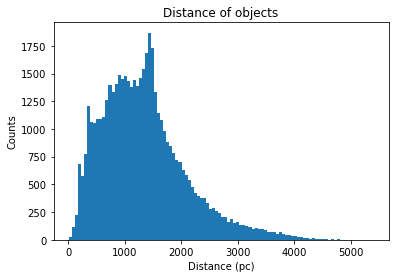

In [ ]:
plt.hist(cleanData['r_est'],bins=100)
plt.xlabel('Distance (pc)')
plt.ylabel('Counts')
plt.title('Distance of objects')
plt.savefig('1D histogram of distance')

plt.show()

Checking for the highest number of bins with the same `r_est`. This should indicate there are a large number of stars at this particular distance. Because the peak does not follow the natural shape of the distribution

Let's reduce the xlimits to get an estimate of the peak. There are other ways to get the peak like with `find_peaks`, but little hard to get around as I'm not too familiar with it.

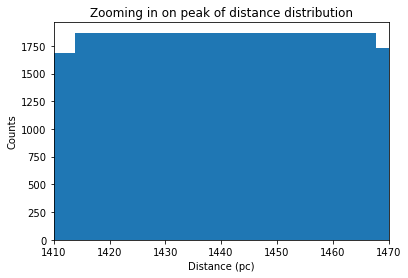

In [ ]:
plt.hist(cleanData['r_est'],bins=100)
plt.xlim(1410,1470)
plt.xlabel('Distance (pc)')
plt.ylabel('Counts')
plt.title('Zooming in on peak of distance distribution')
# plt.savefig('zoom in 1D hist distance')

plt.show()

This shows us the distance for the first cluster we want to use. 

So let's apply a mask for later use. 

In [ ]:
r_estMask1 = cleanData['r_est']>1410
r_estMask2 = cleanData['r_est']<1470
r_estMask  = r_estMask1 & r_estMask2
NGC2477_DF  = cleanData[r_estMask]
NGC2477_DF

Unnamed: 0            source_id        r_est         r_lo  \
68              75  5538872361318511232  1466.966113  1417.550304   
305            322  5538884318507047680  1433.192443  1383.159200   
310            327  5538869165862747648  1448.360407  1379.312604   
360            379  5538882424420965376  1451.997351  1342.996307   
397            416  5538874560341470720  1432.132319  1386.507736   
...            ...                  ...          ...          ...   
824656      856020  5537152514670818944  1439.031366  1322.148201   
825019      856399  5537154473173988480  1468.026662  1415.591325   
825222      856606  5537166400305489280  1446.752714  1388.235286   
825334      856720  5537163617166686208  1467.955470  1412.280212   
825345      856731  5537161040186363264  1443.958892  1336.161130   

               r_hi        r_len  result_flag  modality_flag          ra  \
68      1519.883127  1752.344286            1              1  118.062996   
305     1486.909028  1748.165580            1              1  117.937581   
310     1524.542672  1755.469413            1              1  118.069289   
360     1579.838649  1751.511120            1              1  117.973754   
397     1480.802516  1754.119406            1              1  118.247162   
...             ...          ...          ...            ...         ...   
824656  1578.070446  1620.190264            1              1  115.618666   
825019  1524.417667  1607.227933            1              1  115.478495   
825222  1510.319005  1581.265787            1              1  115.142056   
825334  1528.111086  1573.199891            1              1  115.089818   
825345  1570.257562  1589.746702            1              1  115.287298   

              dec  ...  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
68     -38.419294  ...        14.698868         15.115529         14.099446   
305    -38.315152  ...        15.098893         15.570603         14.458631   
310    -38.544494  ...        14.840875         15.226259         14.276327   
360    -38.440644  ...        16.659330         17.244678         15.908118   
397    -38.412393  ...        14.788313         15.281883         14.125381   
...           ...  ...              ...               ...               ...   
824656 -39.049661  ...        16.900387         17.677107         16.056747   
825019 -39.072052  ...        12.627310         12.749642         12.394821   
825222 -38.955870  ...         9.642416         10.302290          8.898056   
825334 -39.038014  ...        15.114746         15.498325         14.561649   
825345 -39.080555  ...        16.470860         16.963339         15.827153   

        phot_g_mean_flux  phot_bp_mean_flux  phot_rp_mean_flux  \
68          2.487707e+04       1.242635e+04       1.840728e+04   
305         1.721032e+04       8.171728e+03       1.322257e+04   
310         2.182712e+04       1.122152e+04       1.564002e+04   
360         4.088973e+03       1.748574e+03       3.479530e+03   
397         2.290980e+04       1.066110e+04       1.797279e+04   
...                  ...                ...                ...   
824656      3.274849e+03       1.174121e+03       3.034372e+03   
825019      1.676572e+05       1.098243e+05       8.847883e+04   
825222      2.620475e+06       1.046259e+06       2.215876e+06   
825334      1.696086e+04       8.734236e+03       1.202564e+04   
825345      4.864100e+03       2.265790e+03       3.748924e+03   

        phot_g_mean_flux_error  phot_bp_mean_flux_error  \
68                    7.264006                22.261597   
305                   5.640977                15.126101   
310                   6.850953                18.342347   
360                   2.864914                13.097719   
397                   6.307137                17.197304   
...                        ...                      ...   
824656                2.453267                 9.167394   
825019               37.124597               144.132

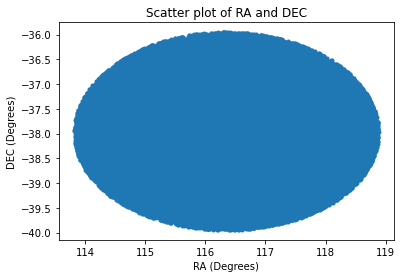

In [ ]:
plt.scatter(cleanData['ra'],cleanData['dec'],marker='.')
plt.xlabel('RA (Degrees)')
plt.ylabel('DEC (Degrees)')
plt.title('Scatter plot of RA and DEC')
plt.savefig('scatter RA and dec')


scatter plot doesn't show anything useful, so lets try using a 2d histogram

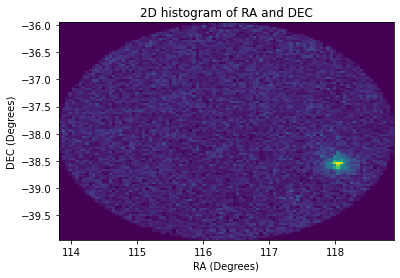

In [ ]:
plt.hist2d(cleanData['ra'],cleanData['dec'],bins=100)
plt.xlabel('RA (Degrees)')
plt.ylabel('DEC (Degrees)')
plt.title('2D histogram of RA and DEC')
plt.savefig('2D histogram of RA and DEC')

plt.show()

reducing the area of interest on the cluster seen above

In [ ]:
raMask1 = cleanData['ra'] <118.25
raMask2  = cleanData['ra'] >117.5

raMask = raMask1 & raMask2

cleanDataCluster = cleanData[raMask]

decMask1 = cleanData['dec'] < -38.4
decMask2 = cleanData['dec'] > -38.7

decMask = decMask1 & decMask2

cleanDataCluster = cleanData[decMask]

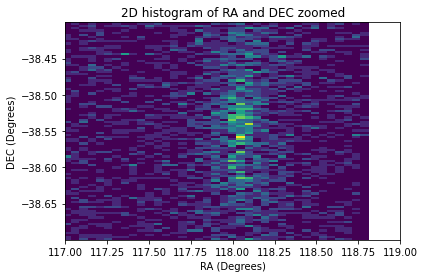

In [ ]:
plt.hist2d(cleanDataCluster['ra'],cleanDataCluster['dec'],bins=100)
plt.xlim(117,119)
# plt.ylim(-38.8, -38.2)
plt.xlabel('RA (Degrees)')
plt.ylabel('DEC (Degrees)')
plt.title('2D histogram of RA and DEC zoomed')
# plt.savefig('2D histogram of RA and DEC zoomed')

plt.show()

Helps us see a little better what the spread looks like

There is one cluster that should become obvious in the plots showing R.A. vs decl. ([NGC2477](https://en.wikipedia.org/wiki/NGC_2477)). Manually isolate the stars in this cluster by selecting stars in the approprate R.A. and decl. range, and explore its properties by plotting the stars separately onto the entire distribution (e.g., plots showing the the distances, the proper motions etc.)

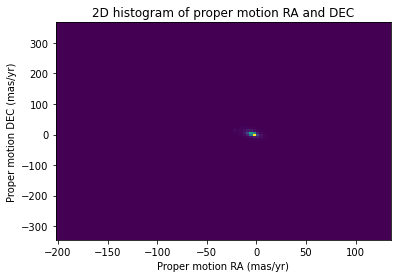

In [ ]:
plt.hist2d(cleanData['pmra'],cleanData['pmdec'],bins=100)
# plt.xlim(20,-20)
# plt.ylim(50,-50)
plt.xlabel('Proper motion RA (mas/yr)')
plt.ylabel('Proper motion DEC (mas/yr)')
plt.title('2D histogram of proper motion RA and DEC')
# plt.savefig('2D histogram of proper motion RA and DEC')
plt.show()

the below is done later on, essentially looking at the spread of the pmRA and dec. 

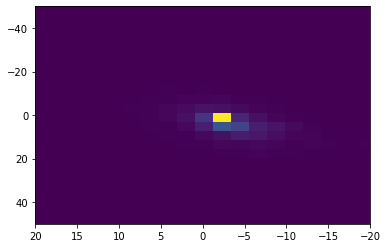

In [ ]:
plt.hist2d(cleanDataCluster['pmra'],cleanDataCluster['pmdec'],bins=100)
plt.xlim(20,-20)
plt.ylim(50,-50)
plt.show()

Doesnt look like much useful information here. Can just see a peak in the middle.

Seaborn:

C:\Users\Rudol\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


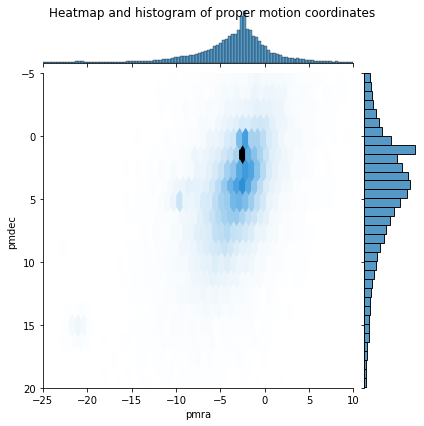

In [ ]:
sns.jointplot(cleanData['pmra'],cleanData['pmdec'], kind = 'hex',xlim=(-25, 10), ylim = (20, -5), marginal_kws = dict(bins=1000), joint_kws = dict(gridsize = 500))

#tried to plot with units on the axes...
# sns.jointplot(x='Proper motion in RA (mas/yr)',y='Proper motion in DEC (mas/yr)',data=(cleanData['pmra'],cleanData['pmdec']), kind = 'hex',xlim=(-25, 10), ylim = (20, -5), marginal_kws = dict(bins=1000), joint_kws = dict(gridsize = 500))


plt.suptitle("Heatmap and histogram of proper motion coordinates")

plt.savefig('Heatmap and histogram of proper motion coordinates')


We can see 1 - 3 clusters. Let's first explore the most noticeable cluster in the middle (blackish)


C:\Users\Rudol\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Zooming in on dense area of heatmap')

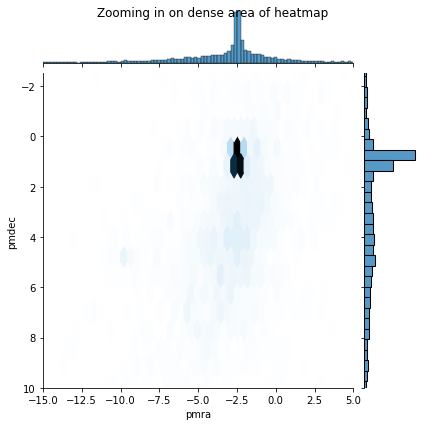

In [ ]:
sns.jointplot(cleanDataCluster['pmra'],cleanDataCluster['pmdec'], kind = 'hex',xlim=(-15, 5), ylim = (10, -2.5), marginal_kws = dict(bins=1000), joint_kws = dict(gridsize = 500))
plt.suptitle("Zooming in on dense area of heatmap")
# plt.savefig('Zooming in on dense area of heatmap')


We can clearly see a cluster now.

GMM will do the below which is finding the stars with the same `pmra` and `pmdec`, this will identify stars in the same cluster. GMM will  also be able to find the other clusters we've sort of been able to spot by eye in the above plots. We can also conclude that there are other stars in the line of sight that are not apart of the cluster. 

In [ ]:
# So let's mask the data so that we can only consider the pmra and pmdec of this cluster.
#Looks like we will need a pmra of (-1.25, -4.5) and a pmdec of (2,0)

# pmraMask1 = cleanDataCluster['pmra'] < -1.25
# pmraMask2 = cleanDataCluster['pmra'] > -4.5
# pmraMask  = pmraMask1 & pmraMask2

# cluster1 = cleanDataCluster[pmraMask]

# pmdecMask1 = cluster1['pmdec'] > 0
# pmdecMask2 = cluster1['pmdec'] < 2
# pmdecMask  = pmdecMask1 & pmdecMask2

# cluster1   = cluster1[pmdecMask]
# cluster1   = 

bins are for reduces the amount of points so that the computer can plot it.

seaborn is useful for alternative visual plots. Tried using the below but did not work.

## **HELP**

Text(0, 0.5, 'Declination (DEC)')

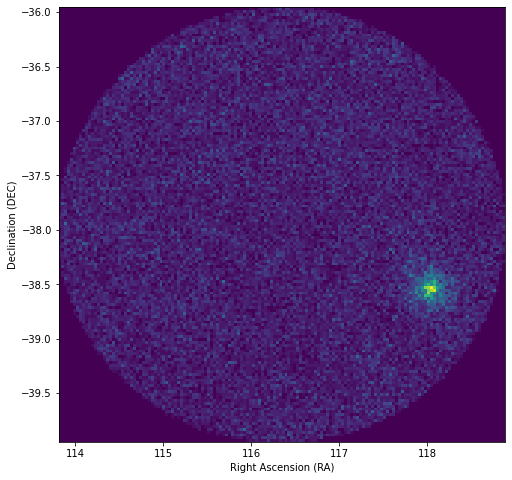

In [ ]:
# Reading in the `.csv` file generated above and assigning the right ascension and declination columns to variables:
gaiaExplore = pd.read_csv('gaiaDFFiltered.csv')
RightAscension = gaiaExplore.ra
Declination = gaiaExplore.dec

# Plotting a 2-dimensional histogram of the equatorial coordinates:
plt.figure(figsize=(8,8))
plt.hist2d(RightAscension, Declination, bins=150)
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (DEC)')

***A noticeable cluster can be seen in the above plot. Known as NGC2477, it has coordinates of right ascension (117.5, 118.5) and declination (-39, -38). Selecting the stars that are found within these coordinate ranges and plotting a histogram for each of the proper motions:***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


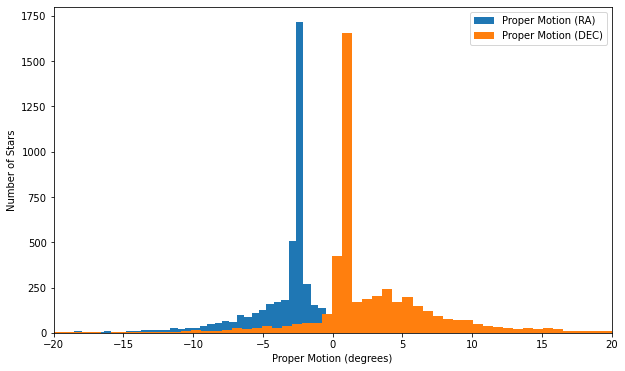

In [ ]:
# The errors shown below arise from this section of code. However, this does not occur
# after performing a similar operation the dataframe later on. While this error is undesirable,
# this did not affect the plotting.
NGC2477 = gaiaExplore[gaiaExplore.ra > 117.5]
NGC2477 = NGC2477[gaiaExplore.ra < 118.5]
NGC2477 = NGC2477[gaiaExplore.dec > -39]
NGC2477 = NGC2477[gaiaExplore.dec < -38]

plt.figure(figsize=(10,6))
plt.hist(NGC2477['pmra'], bins=500, label='Proper Motion (RA)')
plt.hist(NGC2477['pmdec'], bins=500, label='Proper Motion (DEC)')
plt.xlabel('Proper Motion (degrees)')
plt.ylabel('Number of Stars')
plt.xlim(-20,20)
plt.legend()
plt.show()

***There are a large number of stars (~1700 stars) that share a common proper motion. From the above plot, this is approximately -2.5$^\circ$ and +1$^\circ$ in right ascension and declination, respectively. Plotting a histogram of the estimated distances for all stars in the data subset:***

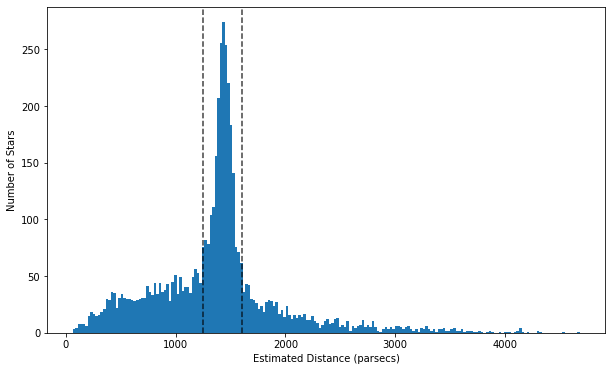

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(NGC2477.r_est, bins=200)
plt.axvline(x=1250, ymin=0, ymax=300, color='k', linestyle='--', alpha=0.75)
plt.axvline(x=1600, ymin=0, ymax=300, color='k', linestyle='--', alpha=0.75)
plt.xlabel('Estimated Distance (parsecs)')
plt.ylabel('Number of Stars')
plt.show()

***A large proportion of stars reside between distances of 1250 and 1600 parsecs. The black vertical dashed lines were positioned on the plot through trial and error.***

# **<font color=red>You should aim to get to here by the end of the first week of this lab!</font>**

# Part 2: Running GMM


In this part, you will begin using Gaussian Mixture Modelling to try to detect clusters, and to identify which stars in the dataset are most likely to belong to those clusters.


## Initial Experimentation with GMM


In the above exploratory phase, the NGC2477 cluster was visible as a localised region with a high number density of stars. In the Week 7 Lectorial, we learned about how the [scikit learn Gaussian Mixture Models](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (see also [here](https://scikit-learn.org/stable/modules/mixture.html#gmm))  can be used to partition data into a number of different components, and then predict which data points belong to the different components. Using your analysis above to guide you, create a dataframe that contains stars in the *distance range* that encompasses the NGC2477 cluster (only select based on distance (r_est) at this stage). This dataset can be used to get a handle on how the GMM process works. Perform the following tasks on your new dataset.

### Step 1:

#### OLD


Start by running GMM on only the R.A. and decl., using 2 components (that is, use two gaussian components to fit the data). Explore the outputs: examine the "means_", "covariances_", and use the "predict" method to assign membership of stars to the 2 components. Plot the results as a scatterplot, using different colours to highlight stars belonging to the different components. Do the results make sense? Do you need more components?

First, applying the `r_est` mask for the distance to NGC2477. 

According to WIKI, there are citiations where the distance ranges from 700 to 1900pc, though this might be old data so we have to use our current data. 

https://en.wikipedia.org/wiki/NGC_2477

We found previously `NGC2477_DF`

In [ ]:
NGC2477_DF

Unnamed: 0            source_id        r_est         r_lo  \
68              75  5538872361318511232  1466.966113  1417.550304   
305            322  5538884318507047680  1433.192443  1383.159200   
310            327  5538869165862747648  1448.360407  1379.312604   
360            379  5538882424420965376  1451.997351  1342.996307   
397            416  5538874560341470720  1432.132319  1386.507736   
...            ...                  ...          ...          ...   
824656      856020  5537152514670818944  1439.031366  1322.148201   
825019      856399  5537154473173988480  1468.026662  1415.591325   
825222      856606  5537166400305489280  1446.752714  1388.235286   
825334      856720  5537163617166686208  1467.955470  1412.280212   
825345      856731  5537161040186363264  1443.958892  1336.161130   

               r_hi        r_len  result_flag  modality_flag          ra  \
68      1519.883127  1752.344286            1              1  118.062996   
305     1486.909028  1748.165580            1              1  117.937581   
310     1524.542672  1755.469413            1              1  118.069289   
360     1579.838649  1751.511120            1              1  117.973754   
397     1480.802516  1754.119406            1              1  118.247162   
...             ...          ...          ...            ...         ...   
824656  1578.070446  1620.190264            1              1  115.618666   
825019  1524.417667  1607.227933            1              1  115.478495   
825222  1510.319005  1581.265787            1              1  115.142056   
825334  1528.111086  1573.199891            1              1  115.089818   
825345  1570.257562  1589.746702            1              1  115.287298   

              dec  ...  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
68     -38.419294  ...        14.698868         15.115529         14.099446   
305    -38.315152  ...        15.098893         15.570603         14.458631   
310    -38.544494  ...        14.840875         15.226259         14.276327   
360    -38.440644  ...        16.659330         17.244678         15.908118   
397    -38.412393  ...        14.788313         15.281883         14.125381   
...           ...  ...              ...               ...               ...   
824656 -39.049661  ...        16.900387         17.677107         16.056747   
825019 -39.072052  ...        12.627310         12.749642         12.394821   
825222 -38.955870  ...         9.642416         10.302290          8.898056   
825334 -39.038014  ...        15.114746         15.498325         14.561649   
825345 -39.080555  ...        16.470860         16.963339         15.827153   

        phot_g_mean_flux  phot_bp_mean_flux  phot_rp_mean_flux  \
68          2.487707e+04       1.242635e+04       1.840728e+04   
305         1.721032e+04       8.171728e+03       1.322257e+04   
310         2.182712e+04       1.122152e+04       1.564002e+04   
360         4.088973e+03       1.748574e+03       3.479530e+03   
397         2.290980e+04       1.066110e+04       1.797279e+04   
...                  ...                ...                ...   
824656      3.274849e+03       1.174121e+03       3.034372e+03   
825019      1.676572e+05       1.098243e+05       8.847883e+04   
825222      2.620475e+06       1.046259e+06       2.215876e+06   
825334      1.696086e+04       8.734236e+03       1.202564e+04   
825345      4.864100e+03       2.265790e+03       3.748924e+03   

        phot_g_mean_flux_error  phot_bp_mean_flux_error  \
68                    7.264006                22.261597   
305                   5.640977                15.126101   
310                   6.850953                18.342347   
360                   2.864914                13.097719   
397                   6.307137                17.197304   
...                        ...                      ...   
824656                2.453267                 9.167394   
825019               37.124597               144.132

Now using `GMM` on RA and dec:

In [ ]:
x = NGC2477_DF[['ra','dec']]

below is from the scikit example

In [ ]:
#gm = GMM(n_components = 2).fit([NGC2477_DF['ra'],NGC2477_DF['dec']])

Using the example from tute: 

In [ ]:
#from the tute: 
from sklearn.datasets import make_blobs as blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans

In [ ]:
gm = GMM(n_components = 2).fit(x) #we are applying 2 fitting components to the GMM function then the fitting the array x

In [ ]:
gm.means_ #provides the means after using the GMM function. 

array([[118.05446197, -38.54926467],
       [116.35254289, -37.95840554]])

In [ ]:
gm.covariances_ #the sqrt of the diagonals are the STD. if we find the smallest STD, that would be the clusters.

array([[[ 0.03185954, -0.00434179],
        [-0.00434179,  0.02540889]],

       [[ 1.53255561, -0.00198121],
        [-0.00198121,  1.0309371 ]]])

In [ ]:
cluster_NGC2477 = gm.predict(x) #predicting which objects belong to the same cluster. 

In [ ]:
print(cluster_NGC2477)

[0 0 0 ... 1 1 1]


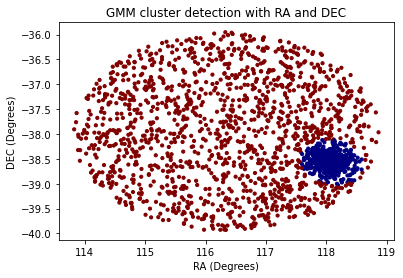

In [ ]:
plt.scatter(NGC2477_DF['ra'], NGC2477_DF['dec'],c = cluster_NGC2477, s=40, cmap= 'jet',marker='.');

plt.xlabel('RA (Degrees)')

plt.ylabel('DEC (Degrees)')
plt.title('GMM cluster detection with RA and DEC')
plt.savefig('GMM cluster detection with RA and DEC')

In [ ]:
NGC2477_DF[cluster_NGC2477==0].shape

(649, 30)

In [ ]:
#checking how many objects are in the predicted cluster: 

NGC2477_DF[cluster_NGC2477==1]

Unnamed: 0            source_id        r_est         r_lo  \
630            664  5538862736291728128  1459.381353  1329.303466   
1144          1211  5538894970025774976  1423.622530  1345.820765   
3922          4136  5538863530866618752  1439.364681  1340.758611   
11239        11822  5538853154225907968  1411.099496  1332.614698   
12552        13215  5538897065969898240  1452.299421  1388.962407   
...            ...                  ...          ...          ...   
824656      856020  5537152514670818944  1439.031366  1322.148201   
825019      856399  5537154473173988480  1468.026662  1415.591325   
825222      856606  5537166400305489280  1446.752714  1388.235286   
825334      856720  5537163617166686208  1467.955470  1412.280212   
825345      856731  5537161040186363264  1443.958892  1336.161130   

               r_hi        r_len  result_flag  modality_flag          ra  \
630     1617.035682  1712.857534            1              1  116.689047   
1144    1510.780339  1744.507755            1              1  118.235487   
3922    1553.294965  1712.830426            1              1  116.684551   
11239   1499.209730  1704.297025            1              1  116.453047   
12552   1521.569280  1743.980820            1              1  118.044805   
...             ...          ...          ...            ...         ...   
824656  1578.070446  1620.190264            1              1  115.618666   
825019  1524.417667  1607.227933            1              1  115.478495   
825222  1510.319005  1581.265787            1              1  115.142056   
825334  1528.111086  1573.199891            1              1  115.089818   
825345  1570.257562  1589.746702            1              1  115.287298   

              dec  ...  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
630    -37.309161  ...        16.679096         17.285393         15.940227   
1144   -38.086147  ...        15.760781         16.294172         15.063806   
3922   -37.276695  ...        16.529062         17.139784         15.796527   
11239  -37.512213  ...        15.824270         16.309116         15.164078   
12552  -38.092141  ...        15.511755         16.027710         14.830787   
...           ...  ...              ...               ...               ...   
824656 -39.049661  ...        16.900387         17.677107         16.056747   
825019 -39.072052  ...        12.627310         12.749642         12.394821   
825222 -38.955870  ...         9.642416         10.302290          8.898056   
825334 -39.038014  ...        15.114746         15.498325         14.561649   
825345 -39.080555  ...        16.470860         16.963339         15.827153   

        phot_g_mean_flux  phot_bp_mean_flux  phot_rp_mean_flux  \
630         4.015207e+03       1.684216e+03       3.378137e+03   
1144        9.354781e+03       4.196492e+03       7.572611e+03   
3922        4.610221e+03       1.925937e+03       3.856179e+03   
11239       8.823443e+03       4.139128e+03       6.904573e+03   
12552       1.176642e+04       5.363779e+03       9.385413e+03   
...                  ...                ...                ...   
824656      3.274849e+03       1.174121e+03       3.034372e+03   
825019      1.676572e+05       1.098243e+05       8.847883e+04   
825222      2.620475e+06       1.046259e+06       2.215876e+06   
825334      1.696086e+04       8.734236e+03       1.202564e+04   
825345      4.864100e+03       2.265790e+03       3.748924e+03   

        phot_g_mean_flux_error  phot_bp_mean_flux_error  \
630                   2.564708                 8.231858   
1144                  5.162527                 9.514679   
3922                  2.775159                 9.552582   
11239                 3.740546                16.054475   
12552                 4.495888                15.362573   
...                        ...                      ...   
824656                2.453267                 9.167394   
825019               37.124597               144.132

We're able to identify the stars in the cluster, though all the other stars are coloured as red indicates they are field stars and do not belong to a cluster. Note, everytime the plot is ran, it swaps the colours for the cluster. Considering we only applied 2 fitting components, we can create 'two' clusters. 

The GMM function has done a pretty good job at finding the objects that belong to the NGC2477 cluster. We can actually check the shapes of the DF for what GMM found and what we found manually, previously. 

GMM can pick up things that are very subtle. showing these small things in a plot is more powerful than other ways. 

two clusters is not enough, that's why the fit is bad. 

#### Help


Start by running GMM on only the R.A. and decl., using 2 components (that is, use two gaussian components to fit the data). Explore the outputs: examine the "means_", "covariances_", and use the "predict" method to assign membership of stars to the 2 components. Plot the results as a scatterplot, using different colours to highlight stars belonging to the different components. Do the results make sense? Do you need more components?

Text(0, 0.5, 'Declination (deg)')

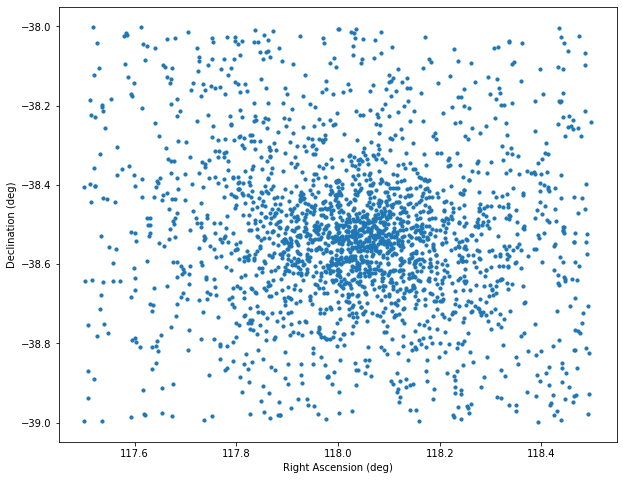

In [ ]:
# Creating a new data frame that contains stars within the distance range that encompasses NGC2477,
# which is marked by the dashed lines in the plot above.
NGC2477New = NGC2477[NGC2477.r_est > 1250]
NGC2477New = NGC2477New[NGC2477New.r_est < 1600]

# Plotting the right ascension and declination of sources in the `NGC2477New` dataframe:
plt.figure(figsize=(10,8))
plt.scatter(x=NGC2477New.ra, y=NGC2477New.dec, marker='o', s=10)
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')

***It turns out that it is easier to use the `'ra'` and `'dec'` notation, rather than `.ra` and `.dec`, for selecting columns in a dataframe. From now on, the rest of the notebook will use this notation but performs the same operation as those with the preceding `.`. Running the GMM with two clusters and performing the fit to the data containing the equatorial coordinates:***

Text(0, 0.5, 'Declination (deg)')

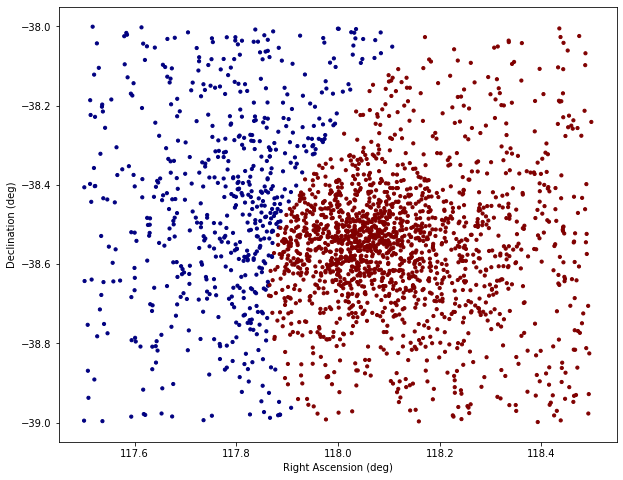

In [ ]:
NGC2477_Data1 = NGC2477New[['ra','dec']]
GMM1_NGC2477New = GMM(n_components=2)
clusters1_NGC2477New = GMM1_NGC2477New.fit(NGC2477_Data1).predict(NGC2477_Data1)

plt.figure(figsize=(10,8))
plt.scatter(NGC2477_Data1['ra'], NGC2477_Data1['dec'], c=clusters1_NGC2477New, marker='o', s=10, cmap='jet')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')

***With just the right ascension and declination values for the stars in NGC2477, the GMM performed poorly in segregating the cluster stars from the background stars.***

### Step 2:


Repeat Step 1, but now include R.A., decl., pmRA , and pmdec in the fit. How does the result compare to that in step 1? 

#### OLD

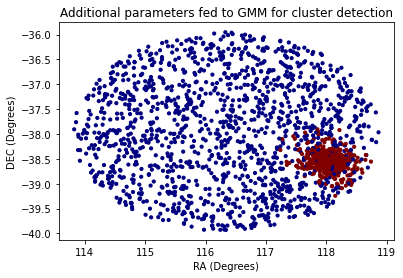

In [ ]:
#applying the GMM function, fitting to our DF
x2 = NGC2477_DF[['ra','dec','pmra','pmdec']]
gm2 = GMM(n_components = 2).fit(x2)
cluster2_NGC2477 = gm2.predict(x2)
#plotting
plt.scatter(NGC2477_DF['ra'], NGC2477_DF['dec'], c = cluster2_NGC2477, s=40, cmap= 'jet',marker='.');
plt.xlabel('RA (Degrees)')
plt.ylabel('DEC (Degrees)')
plt.title('Additional parameters fed to GMM for cluster detection')
plt.savefig('Additional parameters fed to GMM for cluster detection')

In [ ]:
print('number of objects in cluster 0: ',np.size(np.where(cluster2_NGC2477==0)))
print('number of objects in cluster 1: ',np.size(np.where(cluster2_NGC2477==1)))

number of objects in cluster 0:  1454
number of objects in cluster 1:  625


In [ ]:
cluster2_NGC2477

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

We can now see more separation. There are more stars further out that are included in the cluster whereas perviously, they were not. There are also stars within the cluster that are no longer included in the cluster. 

In [ ]:
for i in np.arange(2):
    print('STD of RA, DEC, pmRA, pmDEC')
    for j in np.arange(4):
        print(np.sqrt(gm2.covariances_[i][j,j]))
        
    print(' ')

STD of RA, DEC, pmRA, pmDEC
1.2470190257144413
1.014187191911992
3.3228706115016586
4.729308026180861
 
STD of RA, DEC, pmRA, pmDEC
0.20109294706206793
0.17535409711794342
0.16616433830963948
0.19476055580133228
 


The below is the same as the above just telling us where the cluster is located in the components so we don't have to do it by eye. 

In [ ]:
print(np.sqrt(gm2.covariances_[0][3,3]) <1)

False


In [ ]:
np.sqrt(gm2.covariances_[0][3,3]) and np.sqrt(gm2.covariances_[0][2,2])<1

False

In [ ]:
for i in np.arange(2):
    print('STD of RA, DEC, pmRA, pmDEC')
    for j in np.arange(4):
        print(np.sqrt(gm2.covariances_[i][j,j]))
        if np.sqrt(gm2.covariances_[i][3,3])<1:
            numberComponents= i
    print(' ')
print('The cluster is located in component {}'.format(numberComponents))

STD of RA, DEC, pmRA, pmDEC
1.2470190257144413
1.014187191911992
3.3228706115016586
4.729308026180861
 
STD of RA, DEC, pmRA, pmDEC
0.20109294706206793
0.17535409711794342
0.16616433830963948
0.19476055580133228
 
The cluster is located in component 1


The first component has a proper motion standard deviation of less than one, this is NGC2477

#### Help


Repeat Step 1, but now include R.A., decl., pmRA , and pmdec in the fit. How does the result compare to that in step 1? 

***Including the proper motions of the sources in NGC2477 to compare the performance of the GMM. This time, using four clusters for fitting:***

Text(0, 0.5, 'Declination (deg)')

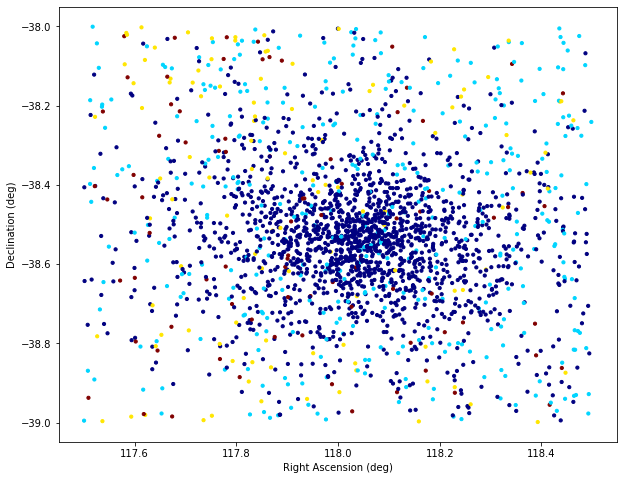

In [ ]:
NGC2477_Data2 = NGC2477New[['ra','dec','pmra','pmdec']]
GMM2_NGC2477New = GMM(n_components=4)
clusters2_NGC2477New = GMM2_NGC2477New.fit(NGC2477_Data2).predict(NGC2477_Data2)

plt.figure(figsize=(10,8))
plt.scatter(NGC2477_Data2['ra'], NGC2477_Data2['dec'], c=clusters2_NGC2477New, marker='o', s=10, cmap='jet')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')

Text(0, 0.5, 'Proper Motion (DEC)')

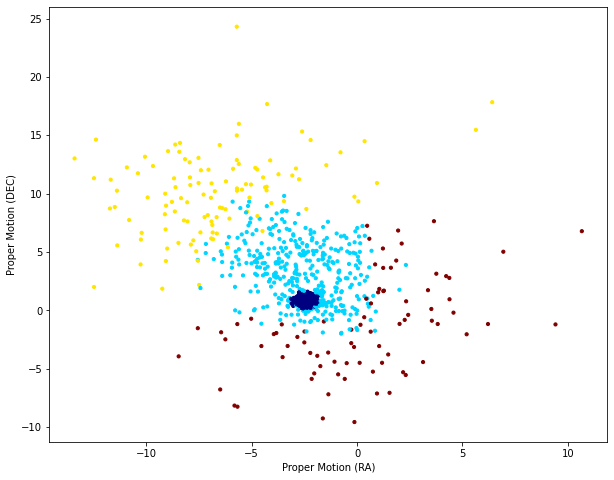

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(NGC2477_Data2['pmra'], NGC2477_Data2['pmdec'], c=clusters2_NGC2477New, marker='o', s=10, cmap='jet')
plt.xlabel('Proper Motion (RA)')
plt.ylabel('Proper Motion (DEC)')

***By including the proper motions into the GMM, it has done a good job at identifying the stars that belong to NGC2477, which is shown in dark blue. A tight grouping of stars in their proper motions are a good indicator for a star cluster.***

### Step 3: 

Here, we want to determine how many components are required to fit the data without "overfitting". Repeat step 2, but code up a loop that increases the number of components fitted by GMM. Determine the "Bayesian Information Criteria", or [BIC](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.bic) (discussed in [Week 3 lectorial](https://github.com/MQ-ASTR3110-2021/ASTR3110_Tutorial_Notebooks_2021/blob/master/Solution_Notebooks/ASTR3110_Tutorial_3_Fitting.ipynb) and [here](https://en.wikipedia.org/wiki/Bayesian_information_criterion)) for each different fit. Report the results by printing to screen. We can use the BIC to determine the optimal number of components that are required to improve the fit without overfitting. This is done by ensuring that in going from a smaller to larger number of components, the BIC decreases by at least 6. Save your BIC values, and plot the the BIC value as a function of the number of components. Also plot the *change* in BIC as the number of components is increased. Use this to determine the optimum number of components, i.e, find the component number where if you incerease that number by one, the change in the BIC no longer *decreases* by more than 6.

#### OLD 

First creating a loop to increase the number of components fitted by GMM:

C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  f"KMeans is known to have a memory leak on Windows "
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


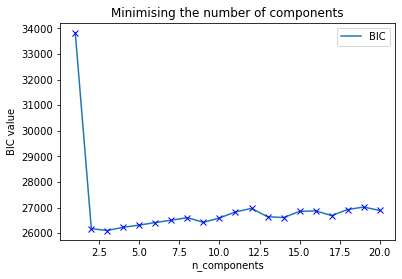

In [ ]:
#from lectorial:
x3 = NGC2477_DF[['ra','dec','pmra','pmdec']]
n_components = np.arange(1, 21)

BIC=[]
for i in np.arange(len(n_components)):
    gmm=GMM(n_components[i],covariance_type='full').fit(x3)
    BIC.append(gmm.bic(x3))
                   
plt.plot(n_components, BIC, label='BIC')
plt.plot(n_components, BIC,'xb', label='')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.ylabel('BIC value')
plt.title('Minimising the number of components')
plt.savefig('Minimising the number of components')


Printing the results of BIC so we can identify once the decrease stops and increase starts. This will tell us the best fit number of components. 

In [ ]:
for i in np.arange(len(BIC)-1):
    print('Change in BIC going from component ',n_components[i],' to ',n_components[i+1],' = ',BIC[i+1]-BIC[i])

Change in BIC going from component  1  to  2  =  -7654.749688593947
Change in BIC going from component  2  to  3  =  -73.76195619539794
Change in BIC going from component  3  to  4  =  126.38543140860565
Change in BIC going from component  4  to  5  =  84.95157169598315
Change in BIC going from component  5  to  6  =  101.65030092026063
Change in BIC going from component  6  to  7  =  91.1687602930142
Change in BIC going from component  7  to  8  =  97.608684816405
Change in BIC going from component  8  to  9  =  -181.51993047029464
Change in BIC going from component  9  to  10  =  170.79392556118182
Change in BIC going from component  10  to  11  =  235.9625766007266
Change in BIC going from component  11  to  12  =  136.95828235393856
Change in BIC going from component  12  to  13  =  -325.4811756176823
Change in BIC going from component  13  to  14  =  -31.549561513569643
Change in BIC going from component  14  to  15  =  240.42670153882864
Change in BIC going from component  15  to

Seems there is a huge decrease from 1-3. slow increase with some decreases later on. 3 to 4 is the best fit. So 3 would be the number of components we want. 

When choosing the best fit, we want to ensure the that going from smaller to larger number of components, the BIC feature decreases by atleast 6. At first, I was confused whether to consider the decreases with later components, then futher increases. Though we just have to consider when the initial increase / decrease by -6 occurs. 

In [ ]:
nFit = 3

#### Help 

***For this step, extract the equatorial coordinates and proper motions for stars in NGC2477 into a new dataframe. Running a loop to calculate the BIC for the number of components fitted by the GMM:***

Change in BIC from component 1 to 2 = -12580.746403331723.
Change in BIC from component 2 to 3 = -2.115731066749504.
Change in BIC from component 3 to 4 = 87.8382480113778.
Change in BIC from component 4 to 5 = 92.12940919285938.
Change in BIC from component 5 to 6 = 38.64278891143931.
Change in BIC from component 6 to 7 = -288.5820117526073.
Change in BIC from component 7 to 8 = 374.1717081795814.
Change in BIC from component 8 to 9 = 153.4281746285469.
Change in BIC from component 9 to 10 = -248.34931434378814.


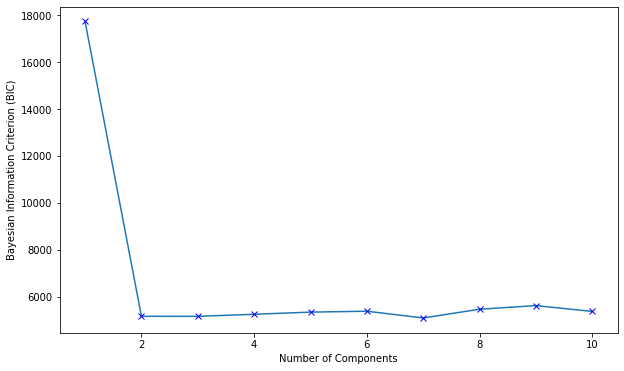

In [ ]:
NGC2477_Data3 = NGC2477New[['ra','dec','pmra','pmdec']]
n_components = np.arange(1,11) # An array containing values corresponding to the number of components that will be fitted by the GMM.
BIC = [] # An empty list to store the BIC associated with the number of components fitted.

for i in np.arange(len(n_components)):
  gmm = GMM(n_components=n_components[i], covariance_type='full').fit(NGC2477_Data3)
  BIC.append(gmm.bic(NGC2477_Data3)) # Adding the BIC associated the number of components into the `BIC` list.

# Plotting the BICs for each component fitted with GMM:
plt.figure(figsize=(10,6))
plt.plot(n_components, BIC, label='BIC')
plt.plot(n_components, BIC, 'xb')
plt.xlabel('Number of Components')
plt.ylabel('Bayesian Information Criterion (BIC)')

# Calculating the change in the BIC when increasing from a smaller to larger number of components:
for i in np.arange(len(BIC)-1):
  print(f"Change in BIC from component {n_components[i]} to {n_components[i+1]} = {BIC[i+1]-BIC[i]}.")

***From the results, the optimal number of components is 2. This is because the change in BIC from 2 to 3 components is smaller than 6.***

### Step 4:

 
Repeat the GMM fit using the optimum number of components determined in Step 3 -- explore the outputs as was done in Step 1. Note how the properties of the identified components are different. In particular, the NGC2447 cluster should have a substantially smaller dispersion (< 1mas/yr) in the pmRA and pmdec -- this is the distinguishing characteristic that allows us to detect clusters in these data. The dispersion can be determined by examining the square root of the diagonal terms in the covariance matrix for each component.

#### OLD

In [ ]:
data = NGC2477_DF[['ra','dec','pmra','pmdec']]
gmmFit = GMM(n_components = nFit).fit(data)
clusterFit_NGC2477 = gmmFit.predict(data)

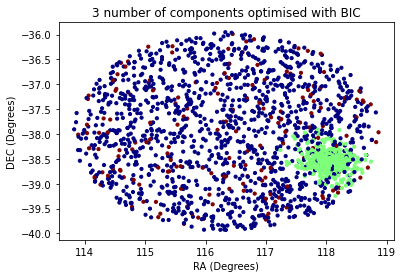

In [ ]:
plt.scatter(NGC2477_DF['ra'], NGC2477_DF['dec'], c = clusterFit_NGC2477, s=40, cmap= 'jet',marker='.');

plt.xlabel('RA (Degrees)')
plt.ylabel('DEC (Degrees)')
plt.title('3 number of components optimised with BIC')
plt.savefig('3 number of components optimised with BIC')

In [ ]:
print('number of objects in cluster 0: ',np.size(np.where(clusterFit_NGC2477==0)))
print('number of objects in cluster 1: ',np.size(np.where(clusterFit_NGC2477==1)))
print('number of objects in cluster 2: ',np.size(np.where(clusterFit_NGC2477==2)))

number of objects in cluster 0:  1283
number of objects in cluster 1:  623
number of objects in cluster 2:  173


Because of the orientation we enetered the dimensions into GMM, the positions of the diagonals of the coviariance matrix are :
* [0,0] = RA
* [1,1] = DEC
* [2,2] = PMRA
* [3,3] = PMDEC

In [ ]:
for i in np.arange(3):
    print('STD of RA, DEC, pmRA, pmDEC')
    for j in np.arange(4):
        print(np.sqrt(gmmFit.covariances_[i][j,j]))
        
    print(' ')

STD of RA, DEC, pmRA, pmDEC
1.2363618329283372
1.0206317460288792
2.613877558595272
3.969511354711726
 
STD of RA, DEC, pmRA, pmDEC
0.19971842181182772
0.17346852812904467
0.1654662280194534
0.1943015424873261
 
STD of RA, DEC, pmRA, pmDEC
1.2817312886887697
0.991387788260127
4.938208733401314
6.601403832247127
 


Text(0.5, 1.0, 'GMM predicting the PM RA and DEC for cluster objects')

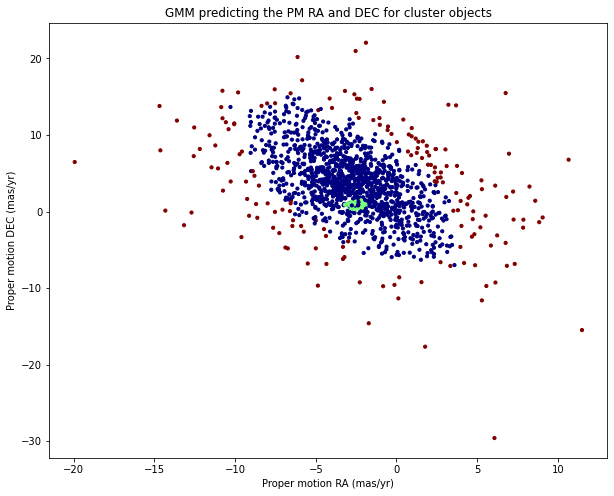

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(NGC2477_DF['pmra'], NGC2477_DF['pmdec'], c = clusterFit_NGC2477, s=40, cmap= 'jet',marker='.');
plt.xlabel('Proper motion RA (mas/yr)')
plt.ylabel('Proper motion DEC (mas/yr)')
plt.title('GMM predicting the PM RA and DEC for cluster objects')
# plt.savefig('GMM predicting the PM RA and DEC for cluster objects')

We can see the cluster (or component) that has the least amount of dispersion in the PM RA and DEC will be an ACTUAL cluster. IF we zoom in on the inner most grouping, we can see their spread of PM RA and DEC will be within 1 mas/yr. Which is confirmed when we did the for loop with the covariance matrix 

We can clarify this by only plotting that component / cluster: 

Text(0.5, 1.0, 'Zooming in on GMM prediction for PM')

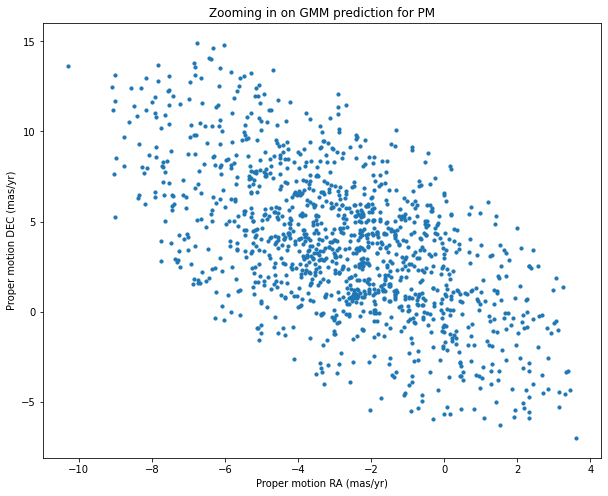

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(NGC2477_DF['pmra'][clusterFit_NGC2477 == 0], NGC2477_DF['pmdec'][clusterFit_NGC2477 == 0], s=40, cmap= 'jet',marker='.');
plt.xlabel('Proper motion RA (mas/yr)')
plt.ylabel('Proper motion DEC (mas/yr)')
plt.title('Zooming in on GMM prediction for PM')
# plt.savefig('Zooming in on GMM prediction for PM')

As we can see on the axes, almost all the points lie within 1 mas/yr

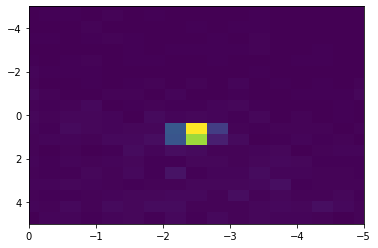

In [ ]:
plt.hist2d(NGC2477_DF['pmra'],NGC2477_DF['pmdec'],bins=100)
plt.xlim(0,-5)
plt.ylim(5,-5)
plt.show()

Cluster is lying within 1 mas for `pmra` and `pmdec`

#### Help

***Using the optimal number of components calculated above for the GMM, the plots of the equatorial coordinates and proper motions of each star are colour-coded from the outputs of the GMM:***

Text(0, 0.5, 'Proper Motion (DEC)')

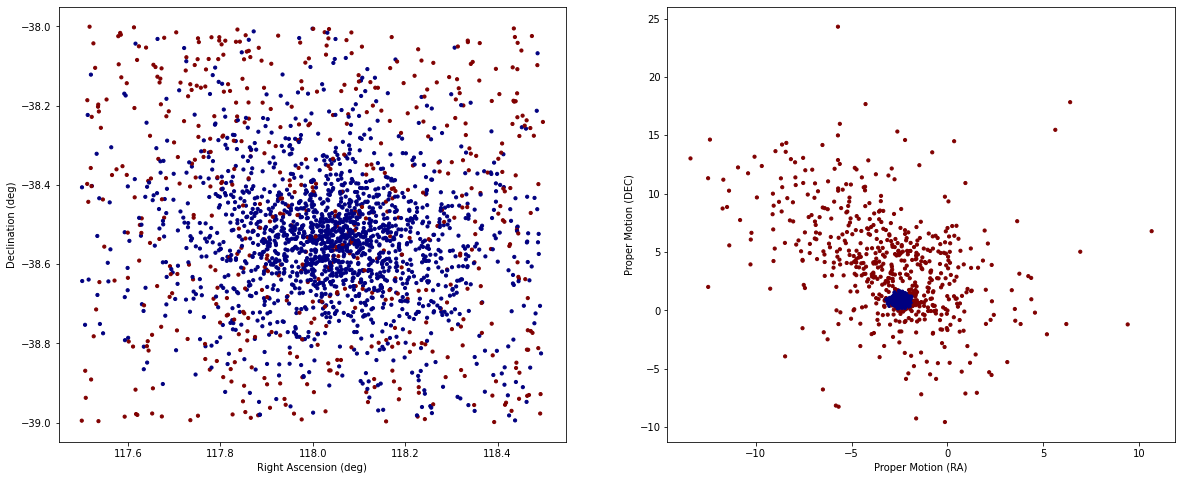

In [ ]:
# Creating a new dataframe using the columns corresponding to 'ra', 'dec' and proper motions.
NGC2477_Data4 = NGC2477New[['ra','dec','pmra','pmdec']] 
GMM4_NGC2477New = GMM(n_components=2) # Using the optimal number of components for the GMM.
clusters4_NGC2477New = GMM4_NGC2477New.fit(NGC2477_Data4).predict(NGC2477_Data4)

# Creating 2 subplots that are plotted along a single row:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))

# The equatorial coordinates of the stars:
ax1.scatter(NGC2477_Data4['ra'], NGC2477_Data4['dec'], c=clusters4_NGC2477New, marker='o', s=10, cmap='jet')
ax1.set_xlabel('Right Ascension (deg)')
ax1.set_ylabel('Declination (deg)')

# The proper motions of the stars:
ax2.scatter(NGC2477_Data4['pmra'], NGC2477_Data4['pmdec'], c=clusters4_NGC2477New, marker='o', s=10, cmap='jet')
ax2.set_xlabel('Proper Motion (RA)')
ax2.set_ylabel('Proper Motion (DEC)')

***The dark blue dots correspond to the cluster stars of NGC2477, while the maroon-coloured ones belong to non-member stars. From the outputs of the GMM, the equatorial coordinates and proper motions for each identified cluster can be determined. The standard deviations for each parameter are given by the square root of the diagonal elements in the covariance matrices:***

In [ ]:
print("Means Matrix:")
print(GMM4_NGC2477New.means_)
# Each column in a particular row (one for each cluster) corresponds to the mean for the RA (1), DEC (2), PMRA (3) and PMDEC (4).

print(" ")
print("Covariance Matrix:")
print(GMM4_NGC2477New.covariances_) # Covariance matrices
print(" ")
print(f"Shape of Covariance Matrix: {GMM4_NGC2477New.covariances_.shape}")
# Shows two 4x4 matrices, with each matrix corresponding to one of the clusters.
# The diagonal elements are the covariances we want to use.
# Shape of 3D matrix: (layers, rows, columns)

print(" ")
# Going through each cluster and finding the standard deviations of each parameter:
for i in np.arange(1,3):
  print(f"Cluster {i}")
  coVar = np.diag(GMM4_NGC2477New.covariances_[i-1,:])
  print(f"Covariances: {coVar}")
  stDev = np.sqrt(coVar)
  print(f"Standard Deviations: {stDev}")
  print(" ")

Means Matrix:
[[118.04175375 -38.54042052  -2.45109228   0.86740334]
 [118.01114474 -38.47456529  -2.99357286   3.87028955]]
 
Covariance Matrix:
[[[ 3.24473096e-02 -3.62343258e-03 -5.90438956e-04 -4.56524916e-03]
  [-3.62343258e-03  2.46040526e-02 -2.80388108e-04 -5.88778735e-04]
  [-5.90438956e-04 -2.80388108e-04  3.33270569e-02  1.36575794e-03]
  [-4.56524916e-03 -5.88778735e-04  1.36575794e-03  4.01019924e-02]]

 [[ 7.30508137e-02 -5.14920312e-03 -4.36024373e-02 -5.08042342e-02]
  [-5.14920312e-03  8.22422673e-02 -7.65766608e-02  1.67340184e-01]
  [-4.36024373e-02 -7.65766608e-02  1.02332866e+01 -6.12994037e+00]
  [-5.08042342e-02  1.67340184e-01 -6.12994037e+00  2.05356464e+01]]]
 
Shape of Covariance Matrix: (2, 4, 4)
 
Cluster 1
Covariances: [0.03244731 0.02460405 0.03332706 0.04010199]
Standard Deviations: [0.18013137 0.15685679 0.182557   0.20025482]
 
Cluster 2
Covariances: [ 0.07305081  0.08224227 10.23328664 20.5356464 ]
Standard Deviations: [0.27027914 0.28677913 3.1989508

***Since cluster stars share similar proper motions, the small values in the standard deviations for Cluster 1 belong to the dark-blue dots. This means that the first row in the 'Means Matrix' are the galactic coordinates and proper motions of NGC2477.***

## Finding the other clusters



Now that you have used GMM to identify NGC2477, as well as determine which stars are most likely members, you can find the other two clusters in the data (NGC2451A and NGC2451B). These two clusters are not at all obvious as overdensities in R.A. and decl. because they are lost in the background of field stars. We can find these clusters in a semi-automated fashion by running GMM as outlined above, but now in separate distance bins, and looking for the compact clusterings in proper motion that we identified for NGC2477. The segregation by distance helps to increase the contrast of the cluster stars against the backdrop of the field stars, which in turn allows GMM to more easily locate the star clusters in RA, dec, pmRA and pmdec.

To do this, you will need design an algorithm that does the following:
- Generate bins in distance, e.g., 8 distance bins with width 250pc so that the first bin runs from 0-250pc, the second 250-500pc, and so forth.
- For each distance bin select the subset of stars within that distance range. 
- On the subset of stars, run your GMM algorithm on RA, dec, pmra, pmdec, using the BIC to determine the optimal number of components required.
- Generate appropriate plots and print any results/outputs that will help you to understand which distance ranges contain clusters, and what their properties are.


### **OLD**
* should be plotting means and std (w9 lab). 
* the means comes out as an array: however many components vs features.
* covariance matrix we want the diagonals. 

Setting up bin ranges:

In [ ]:
x_i   = 0
steps = 250
x_f   = x_i + steps*8


r_estBins = np.arange(x_i, x_f, steps)
r_estBins

array([   0,  250,  500,  750, 1000, 1250, 1500, 1750])

Other people getting clusters belonging to these bins:
0-250, 250-500, 1250-1500. 1500-1750

The following cell will:
* Setting up a function that uses the bin ranges to apply a mask to the DF. 
* displaying the number of components, allowing us to choose how many is required for the gmm function. 
* plotting the BIC, RA vs DEC and pmRA vs pmDEC
* returns our binned DF, optimal number of components and the cluster groupings (`clusterFit`).

In [ ]:
def r_estBinFn(d,binRange,DF): #better to call the DF rather than including the DF in the function. 
    r_estMask1 = DF['r_est'] > d
    r_estMask2 = DF['r_est'] < d+250
    r_estMask  = r_estMask1 & r_estMask2
    binDF      = DF[r_estMask]
    
    #-------------------------------------------------
    #checking with a number of components through BIC 
    
    x_BIC = binDF[['ra','dec','pmra','pmdec']]
    n_components = np.arange(1, 21)

    BIC=[]
    for i in np.arange(len(n_components)):
        gmm=GMM(n_components[i],covariance_type='full').fit(x_BIC)
        BIC.append(gmm.bic(x_BIC))
                   
    plt.figure(figsize = (10,8))
    plt.plot(n_components, BIC, label='BIC',marker='.')
    plt.plot(n_components, BIC,'xb', label='',marker='.')
    plt.legend(loc='best')
    plt.xlabel('n_components');
    plt.ylabel('BIC value')
    plt.show()        
#     plt.savefig('Bin range '+binRange)
    
    #------------------------
    #Determining the optimal number of components
    
    i = 0
    delBIC = 6
    while delBIC >= 6: 
        delBIC = BIC[i] - BIC[i+1]
#         print(i,delBIC)
        i+=1
    nFit = i
    
    plt.figure(figsize = (10,8))
    data = binDF[['ra','dec','pmra','pmdec']]
    gmmFit = GMM(n_components = nFit).fit(data)
    clusterFit = gmmFit.predict(data)
    plt.scatter(binDF['ra'], binDF['dec'], c = clusterFit, s=40, cmap= 'jet',marker='.');
    plt.xlabel('RA (Degrees)')
    plt.ylabel('DEC (Degrees)')
    plt.title('Cluster association for bin '+binRange)
#     plt.savefig('Cluster association for bin '+binRange)

    plt.show()

    plt.figure(figsize = (10,8))
    plt.scatter(binDF['pmra'], binDF['pmdec'], c = clusterFit, s=40, cmap= 'jet',marker='.');
    plt.xlabel('Proper motion RA (mas/yr)')
    plt.ylabel('Proper motion DEC (mas/yr)')
    plt.title('Cluster PM for bin '+binRange)
#     plt.savefig('Cluster PM for bin '+binRange)

    plt.show()

    #------------------------
    #determining the std of RA, DEC, pmRA, pmDEC through the diagonals of the covariance matrix.
    
    
    for j in np.arange(nFit):
        print('STD of RA, DEC, pmRA, pmDEC')
        for k in np.arange(4):
            print(np.sqrt(gmmFit.covariances_[j][k,k]))
            if np.sqrt(gmmFit.covariances_[j][3,3]) and np.sqrt(gmmFit.covariances_[j][2,2])<1:
                clusterComponent= j
        print(' ')
    print('The cluster is located in component {}'.format(clusterComponent))
    return binDF, nFit, clusterFit, clusterComponent

# #plotting hist with dist, separately

C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  f"KMeans is known to have a memory leak on Windows "


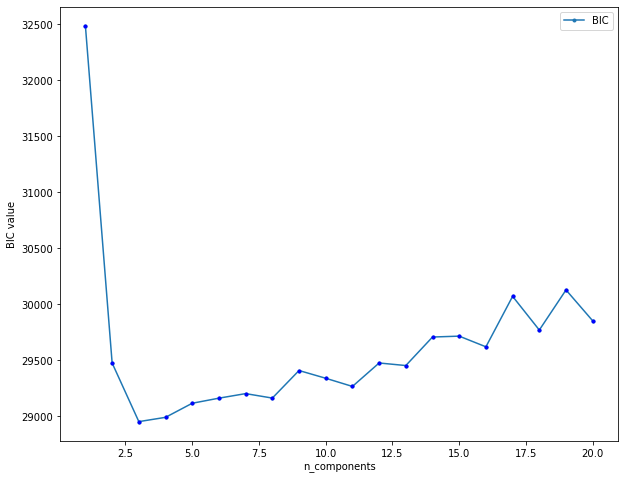

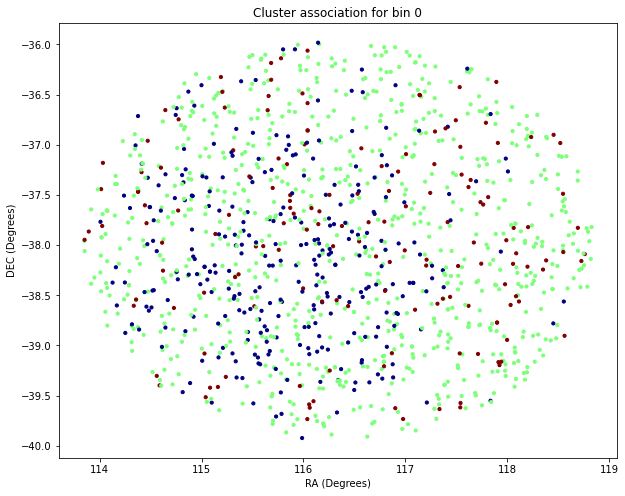

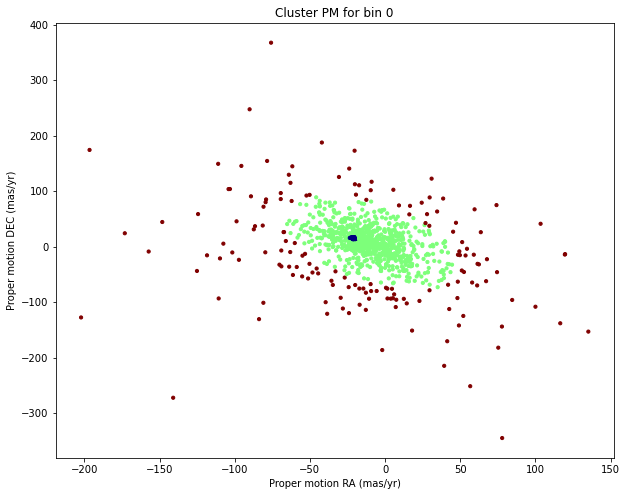

STD of RA, DEC, pmRA, pmDEC
0.8856923975709553
0.8130612653885904
0.7865597941226683
0.6741820558710286
 
STD of RA, DEC, pmRA, pmDEC
1.2707016253385979
1.001301549168449
20.068347003459678
28.665557740792476
 
STD of RA, DEC, pmRA, pmDEC
1.2984443350198904
0.9228975478429582
59.304338031377526
90.39834971846294
 
The cluster is located in component 0


In [ ]:
bin0_DF, nFit0, clusterFit0, clusterComponent0 = r_estBinFn(0,'0',cleanData)

STD of pmRA and pmDEC for first component< 1 $\therefore$ we can conclude this is a cluster. 

C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  f"KMeans is known to have a memory leak on Windows "


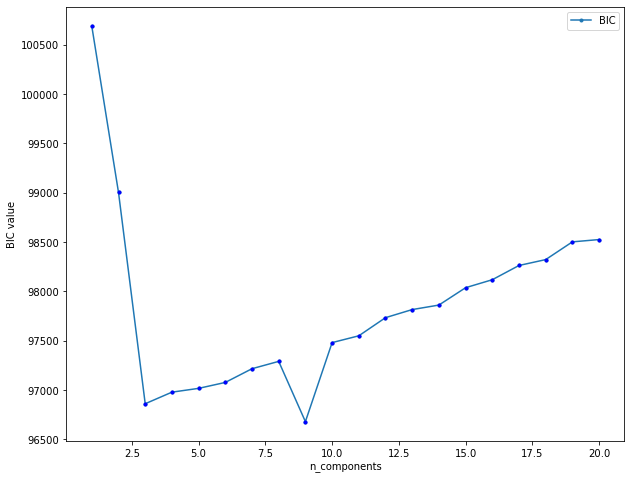

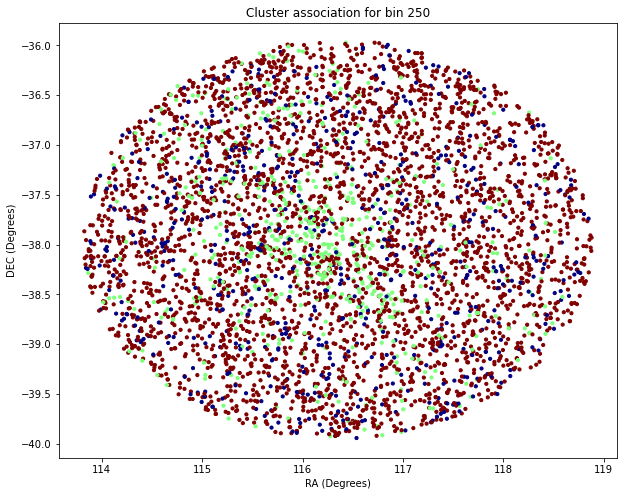

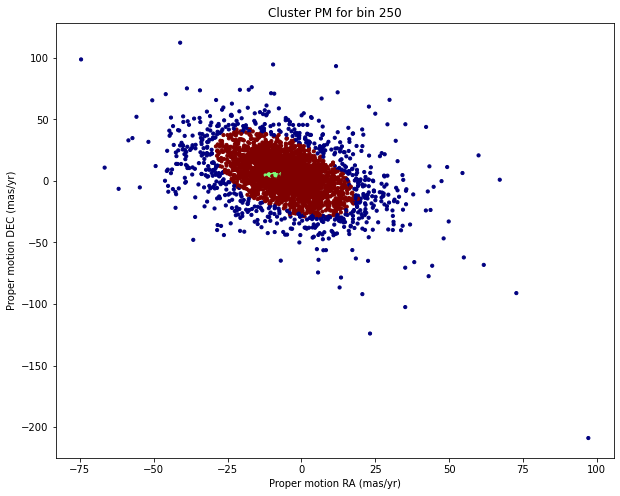

STD of RA, DEC, pmRA, pmDEC
1.2367170949516944
1.0037529081786807
21.25284809912638
29.437413539780806
 
STD of RA, DEC, pmRA, pmDEC
0.9063303239557734
0.8335834859210589
0.9939538203016232
0.44409379035917323
 
STD of RA, DEC, pmRA, pmDEC
1.2476708779375247
1.015268316809178
9.112873583368588
13.307712730917016
 
The cluster is located in component 1


In [ ]:
bin250_DF, nFit250, clusterFit250, clusterComponent250 = r_estBinFn(250,'250',cleanData)

STD of pmRA and pmDEC for first component< 1, therefore we can conclude these objects are in the same cluster.

STD >> 1 therefore, they are not in the same cluster. 

STD >> 1 therefore, they are not in the same cluster. 

STD >> 1 therefore, they are not in the same cluster. 

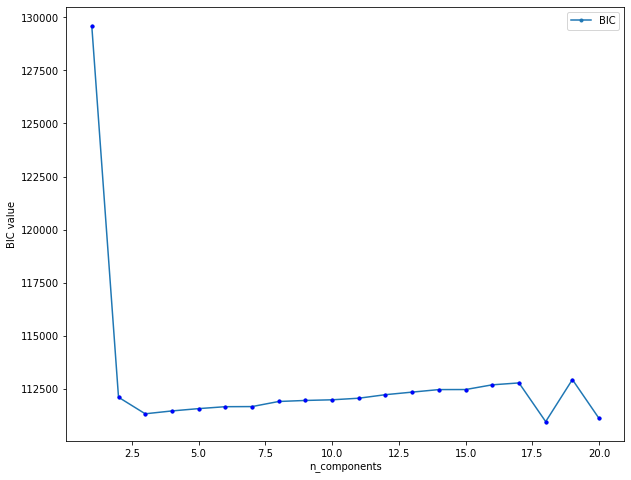

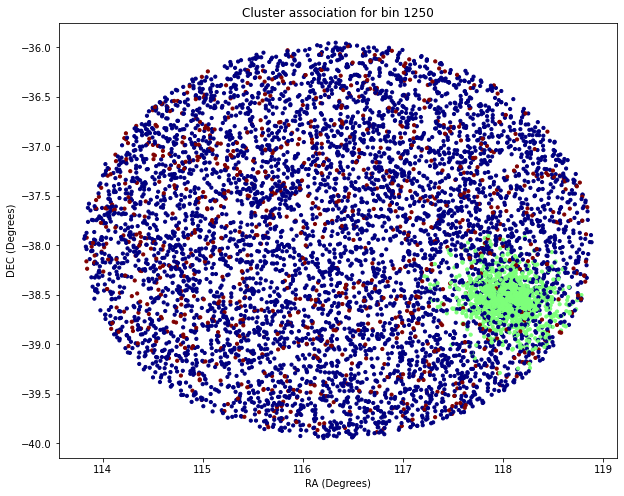

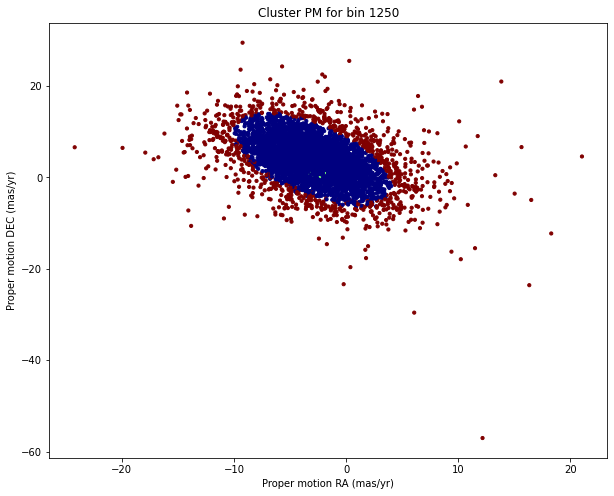

STD of RA, DEC, pmRA, pmDEC
1.2637456636263367
1.010055225391981
2.6697131444203817
3.800618066770733
 
STD of RA, DEC, pmRA, pmDEC
0.21041129344085613
0.17823770481327936
0.18348540312118805
0.19995777174352206
 
STD of RA, DEC, pmRA, pmDEC
1.2676412747135064
1.0011555986419844
5.181799577066408
7.055546642871319
 
The cluster is located in component 1


In [ ]:
bin1250_DF, nFit1250, clusterFit1250,clusterComponent1250 = r_estBinFn(1250,'1250',cleanData)

STD of pmRA and pmDEC for third component < 1 therefore they are in the same cluster. This is the same cluster we spotted before, NGC2477

the STD of pmRA and pmDEC of each component is greater than 1. They do not belong in the same cluster. I've changed the cells for those bins to raw format so there's less scrolling...

In conclusion, we found clusters in bins: 
* 0-250
* 250-500
* 1250-1500 (at the beginning of the lab, we set this r_est to 1410 - 1470)

In [ ]:
#checking how many objects have been predicted to be in this bin range
np.size(np.where(clusterFit1250==1))

#according to WIKI, only 300 objects are suposed to be in this cluster. 
#let's try to change the bin range for this cluster. 

1505

### **HELP**

***The size of the distance bins were selected to be 200 parsecs. For each distance bin, the sources that reside inside this range were selected. The `r_est` column was not used in the operation of the GMM. A similar loop from before is used here to calculate the BIC associated with the number of components fitted. Then it selects the optimal number based off the same criterion mentioned previously. Using this value, the GMM was re-initiated and the corresponding mean vectors and covariance matrices were printed for each cluster found in each distance bin. The clusters were identified by eye from the plots generated by the code below.***

In [ ]:
# Creating distance bins:
n_components = np.arange(1,11) # Number of components that will be run through the GMM.
interval_size = 200 # Size of the distance bin.

for bin in np.arange(0,10): # Total of 10 bins that cover a distance of 2000 parsecs.
  binMin = interval_size*bin
  binMax = interval_size*(bin+1)
  print(f"Distance Range (Parsecs): {binMin} to {binMax}")
  print(" ")

  # Filtering the dataframe with the different distance bins:
  # Using columns corresponding to the equatorial coordinates, proper motions and estimated distances.
  df = gaiaExplore[['ra','dec','pmra','pmdec','r_est']] 
  df = df[(df['r_est'] >= binMin) & (df['r_est'] < binMax)] # Selecting sources within the relevant distance bin.
  df.pop('r_est') # The estimated distance columns are not used for the GMM.

  # Running through many components and calculating their BIC:
  BIC = [] # An empty list like before.
  for i in np.arange(len(n_components)):
    gmm = GMM(n_components=n_components[i], covariance_type='full').fit(df)
    BIC.append(gmm.bic(df))

  # Plotting the BIC for each component:
  plt.figure(figsize=(20,6))
  plt.plot(n_components, BIC, label='BIC')
  plt.plot(n_components, BIC, 'xb')
  plt.xlabel('Number of Components')
  plt.ylabel('Bayesian Information Criterion (BIC)')

  # Determining the optimal number of components by calculating the change in BIC between successive values:
  optimal_component = 0
  for j in np.arange(len(BIC)-1):
    if (BIC[j+1]-BIC[j]) > -6:
      optimal_component = j+1
      print(f"The optimal number of components is {j+1}.")
      print(" ")

      # Running the GMM with the optimal number of components:
      gmm = GMM(n_components=j+1)
      clusters = gmm.fit(df).predict(df)

      # Finding the means and standard deviations for each cluster:
      for k in np.arange(1,j+2):
        print(f"Cluster {k}")
        clusterMeans = gmm.means_[k-1,:]
        print(f"Means: {clusterMeans}")
        clusterCoVar = np.diag(gmm.covariances_[k-1,:])
        clusterStDev = np.sqrt(clusterCoVar)
        print(f"Standard Deviations: {clusterStDev}")
        print(" ")

      # Plotting the data sorted into their respective clusters:
      fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

      ax1.scatter(df['ra'], df['dec'], c=clusters, marker='o', s=10, cmap='jet')
      ax1.set_xlabel('Right Ascension (deg)')
      ax1.set_ylabel('Declination (deg)')
      ax2.scatter(df['pmra'], df['pmdec'], c=clusters, marker='o', s=10, cmap='jet')
      ax2.set_xlabel('Proper Motion (RA)')
      ax2.set_ylabel('Proper Motion (DEC)')
      plt.show()
      print("-----")
      break

## Finalising the clusters and determining membership.


Use the results from the previous section to select appropriate distance ranges for the 3 clusters. Select the subset of stars within those distance ranges and rerun GMM on each subset in order to refine the membership. You should now only need to fit for 2 components; one for the cluster stars and one for the field stars. For this final part, you should include the distance (r_est) in the GMM fit in order to get the best membership constraint for the stars. 

You should now be able to assign the stars in this region to either the field or one of the NGC2451A, NGC2451B or NGC2477 clusters. Use your final membership to plot the distribution of clusters stars in position (R.A., dec), proper motion (pmRA, pmdec), and distance in comparision to non-cluster stars.

You can also use your final samples of member stars to determine important parameters for each of the clusters such as mean distance, total number of stars, mean position etc. These parameters can be recorded in your writeup, along with any other parameters you might think are important.

### **OLD**
we need to use `bin0_DF`, `bin250_DF` and `bin1250_DF`

Going back to the same method we used from the very early steps to extract the distance bins with the histogram. Actually, it's better to use the histogram to plot the spotted clusters: 


In [ ]:
#I"m not sure what happened, but calling the r_estBinFn did not like the bin 1250, so I have to do it manually here: 
r_estMask1 = cleanData['r_est'] > 1250
r_estMask2 = cleanData['r_est'] < 1250+250
r_estMask = r_estMask1 & r_estMask2

bin1250_DF = cleanData[r_estMask]

Below is a plot of the histograms without the clustered objects we've found previously with `clusterFit` in the `r_estBinFn`

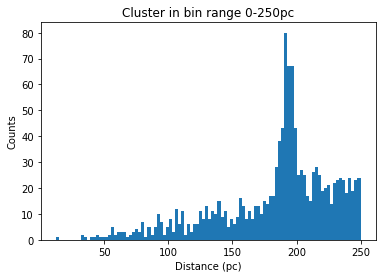

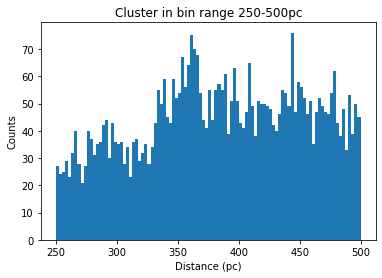

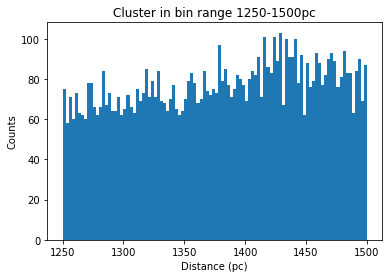

In [ ]:
plt.hist(bin0_DF['r_est'],bins=100)
plt.xlabel('Distance (pc)')
plt.ylabel('Counts')
plt.title('Cluster in bin range 0-250pc')
plt.show()

plt.hist(bin250_DF['r_est'],bins=100)
plt.xlabel('Distance (pc)')
plt.ylabel('Counts')
plt.title('Cluster in bin range 250-500pc')
plt.show()

plt.hist(bin1250_DF['r_est'],bins=100)
plt.xlabel('Distance (pc)')
plt.ylabel('Counts')
plt.title('Cluster in bin range 1250-1500pc')
plt.show()


It is a bit difficult to determine which ranges the cluster actually lies in as we've essentially just plotted all the stars together. So let's apply the `clusterFit` to each bin range of the DFs `clusterFit` is an array to tell us which cluster/component the objets belong to. 

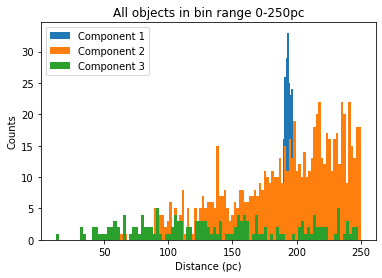

In [ ]:
plt.hist(bin0_DF[clusterFit0 == 0]['r_est'],bins=100,label = 'Component 1')
plt.hist(bin0_DF[clusterFit0 == 1]['r_est'],bins=100,label = 'Component 2')
plt.hist(bin0_DF[clusterFit0 == 2]['r_est'],bins=100,label = 'Component 3')
plt.xlabel('Distance (pc)')
plt.ylabel('Counts')
plt.title('All objects in bin range 0-250pc')
plt.legend()

plt.show()

Looks like component 3 is where the cluster is located as there is the least amount of spread. 

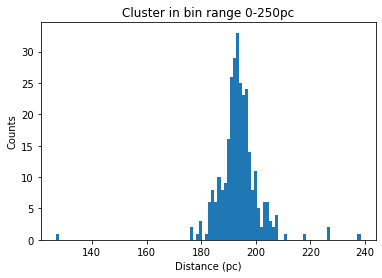

In [ ]:
plt.hist(bin0_DF[clusterFit0 == clusterComponent0]['r_est'],bins=100)
plt.xlabel('Distance (pc)')
plt.ylabel('Counts')
plt.title('Cluster in bin range 0-250pc')
plt.show()


Considering we used `GMM` to predict that all the stars in this selection belong to the cluster, I believe we should actually use the entire range for it rather than just the cluster. Still, applying a range to the entire DF for the mask/binned range:

In [ ]:
r_estMask_bin0 = clusterFit0 == clusterComponent1250

# r_estMask_bin250 = r_estMask1_bin250 & r_estMask2_bin250
newBin0_DF = bin0_DF[r_estMask_bin0]
print('Before applying GMM to binned DF: ',bin0_DF.shape,' and after applying: ',newBin0_DF.shape)

Before applying GMM to binned DF:  (1256, 30)  and after applying:  (803, 30)


now we have a masked DF for the bin 0-250 and have drastically reduced the amount of objects in the DF. Let's do the same for the other bins with clusters in them

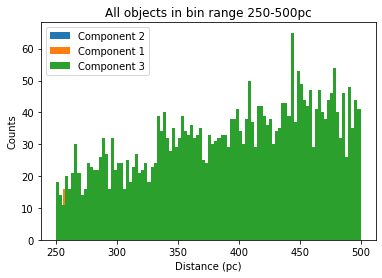

In [ ]:
plt.hist(bin250_DF[clusterFit250 == 1]['r_est'],bins=100,label = 'Component 2')
plt.hist(bin250_DF[clusterFit250 == 0]['r_est'],bins=100,label = 'Component 1')
plt.hist(bin250_DF[clusterFit250 == 2]['r_est'],bins=100,label = 'Component 3')
plt.xlabel('Distance (pc)')
plt.ylabel('Counts')
plt.title('All objects in bin range 250-500pc')
plt.legend()

plt.show()

This one is hard to tell which component / `clusterFit` to use as I can't figure out, by looking at the histogram, which objects actually belong to a cluster. Although, previously it was mentioned that the STD is less than 1 for the first component, so let's plot that. Seems component 3 is blocking the other components...

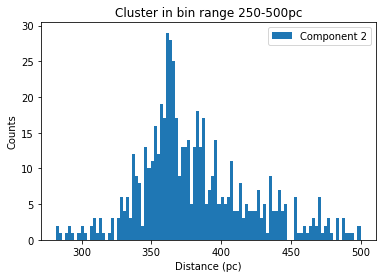

In [ ]:
plt.hist(bin250_DF[clusterFit250 == clusterComponent250]['r_est'],bins=100,label = 'Component 2')
plt.xlabel('Distance (pc)')
plt.ylabel('Counts')
plt.title('Cluster in bin range 250-500pc')

plt.legend()
plt.show()

Only choosing objects in the cluster using `clusterFit250`

In [ ]:
r_estMask_bin250 = clusterFit250 == clusterComponent250
newBin250_DF = bin250_DF[r_estMask_bin250]
newBin250_DF.shape

(585, 30)

Again, we've drastically reduced the number of objects in this DF. Moving on to the next bin range:

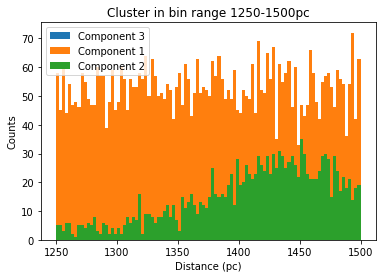

In [ ]:
plt.hist(bin1250_DF[clusterFit1250 == 2]['r_est'],bins=100,label = 'Component 3')
plt.hist(bin1250_DF[clusterFit1250 == 0]['r_est'],bins=100,label = 'Component 1')
plt.hist(bin1250_DF[clusterFit1250 == 1]['r_est'],bins=100,label = 'Component 2')
plt.xlabel('Distance (pc)')
plt.ylabel('Counts')
plt.title('Cluster in bin range 1250-1500pc')


plt.legend()

plt.show()

Sometimes when the cell is run, component 2 blocks the data from the other components, rendering the histogram useless. Knowing that the cluster is located in component 1, we can plot it with the below: 

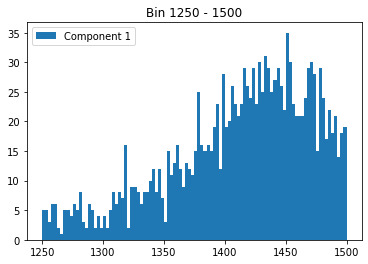

In [ ]:
plt.hist(bin1250_DF[clusterFit1250 == clusterComponent1250]['r_est'],bins=100,label = 'Component 1')
plt.legend()
plt.title('Bin 1250 - 1500')

plt.show()

Note, I've called the zeroth component component 1, as I didn't think it would make much sense having the legend in the plot saying 'Component 0'

In [ ]:
r_estMask_bin1250 = clusterFit1250 == clusterComponent1250
newBin1250_DF = bin1250_DF[r_estMask_bin1250]
print("Comparing DF shapes of old and new: ",bin1250_DF.shape, newBin1250_DF.shape)

Comparing DF shapes of old and new:  (7704, 30) (1505, 30)


The number of objects is still quite high, possible a large cluster? We've found this cluster previously to be NGC2477 and it has more objects in it then the other clusters in question. Let's run the new DFs through the GMM function again, trying to get one component ouput for each bin range containing the clusters:

### **HELP**

***From the plots generated by the previous code, three clusters were identified. They ranged between 0-200 pc, 200-400 pc and 1200-1600 pc.***

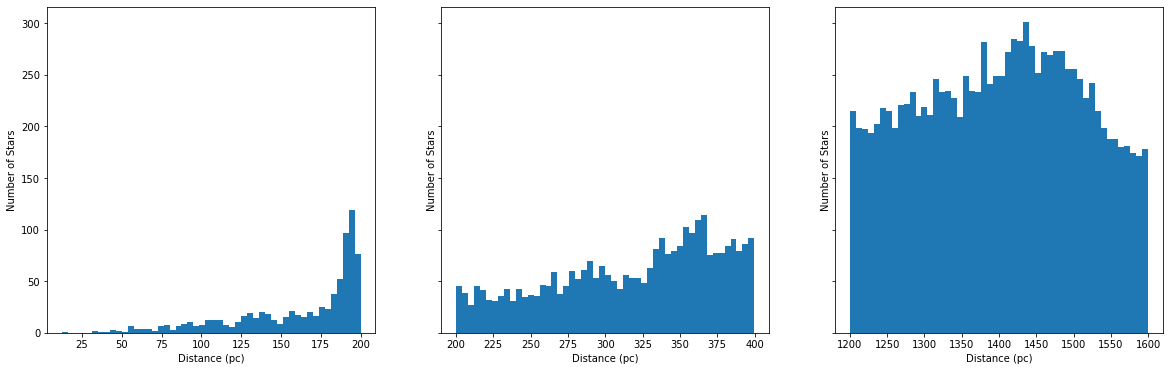

In [ ]:
# Creating separate dataframes with stars found in the above distance ranges:
gaiaData = gaiaExplore[['ra','dec','pmra','pmdec','r_est']]
gaiaDataBin1 = gaiaData[(gaiaData['r_est'] >= 0) & (gaiaData['r_est'] < 200)]
gaiaDataBin2 = gaiaData[(gaiaData['r_est'] >= 200) & (gaiaData['r_est'] < 400)]
gaiaDataBin3 = gaiaData[(gaiaData['r_est'] >= 1200) & (gaiaData['r_est'] < 1600)]

# Plotting histograms of the estimated distances of stars within each dataframe:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6), sharey=True)
ax1.hist(gaiaDataBin1['r_est'],bins=50)
ax1.set_xlabel('Distance (pc)')
ax1.set_ylabel('Number of Stars')

ax2.hist(gaiaDataBin2['r_est'],bins=50)
ax2.set_xlabel('Distance (pc)')
ax2.set_ylabel('Number of Stars')

ax3.hist(gaiaDataBin3['r_est'],bins=50)
ax3.set_xlabel('Distance (pc)')
ax3.set_ylabel('Number of Stars')

plt.show()

In [ ]:
# Create a dictionary to easily access stars that belong in a cluster or field.
clusterStars = {}
fieldStars = {}

# Defining a function that takes a dataframe of sources and runs the GMM to find the cluster stars:
def GMMPlots(data, clusterName):
  gmm = GMM(n_components=2, covariance_type='full')
  clusters = gmm.fit(data).predict(data)
  stDev_PM = [] # Used to select cluster and field stars.

  for num, k in enumerate(gmm.covariances_):
    print(f"Cluster {num}")
    clusterMeans = gmm.means_[num,:]
    print(f"Means: {clusterMeans}")
    clusterStDev = np.sqrt(np.diag(k))
    print(f"Standard Deviations: {clusterStDev}")
    stDev_PM.append(clusterStDev[2]+clusterStDev[3])
    print(" ")

  # The small standard deviations in proper motions will correspond to the cluster.
  # These will be used to segregate the cluster from the field stars.
  starCluster = np.argmin(stDev_PM)
  fieldCluster = np.argmax(stDev_PM)

  # Adding the cluster and field stars into the dictionaries above:
  clusterStars[clusterName] = data[clusters==starCluster]
  fieldStars[clusterName] = data[clusters==fieldCluster]

  # Generating plots that were created previously:
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))

  ax1.scatter(data['ra'][clusters==starCluster], data['dec'][clusters==starCluster], c='dodgerblue', marker='o', s=11, label=clusterName, zorder=10)
  ax1.scatter(data['ra'], data['dec'], c='darkorange', marker='o', s=10, label='Field Stars')
  ax1.set_xlabel('Right Ascension (deg)', fontsize=16)
  ax1.tick_params(axis="x", labelsize=14) 
  ax1.set_ylabel('Declination (deg)', fontsize=16)
  ax1.tick_params(axis="y", labelsize=14) 
  ax1.legend(loc=1, markerscale=3, prop={'size': 15}).set_zorder(50)

  ax2.scatter(data['pmra'][clusters==starCluster], data['pmdec'][clusters==starCluster], c='dodgerblue', marker='o', s=11, label=clusterName, zorder=10)
  ax2.scatter(data['pmra'], data['pmdec'], c='darkorange', marker='o', s=10, label='Field Stars')
  ax2.set_xlabel('Proper Motion RA (deg)', fontsize=16)
  ax2.tick_params(axis="x", labelsize=14) 
  ax2.set_ylabel('Proper Motion DEC (deg)', fontsize=16)
  ax2.tick_params(axis="y", labelsize=14) 
  ax2.legend(loc=1, markerscale=3, prop={'size': 15}).set_zorder(50)

  plt.show()
  print(" ")

Cluster 0
Means: [115.8403431  -38.17026323 -21.08482322  15.27875025 192.25941157]
Standard Deviations: [0.86934308 0.78793283 0.77802317 0.65734666 4.47214556]
 
Cluster 1
Means: [116.43335842 -37.94349646 -13.30169122   4.189305   145.01459987]
Standard Deviations: [ 1.25757689  0.99685058 38.919654   59.07617203 41.03089303]
 


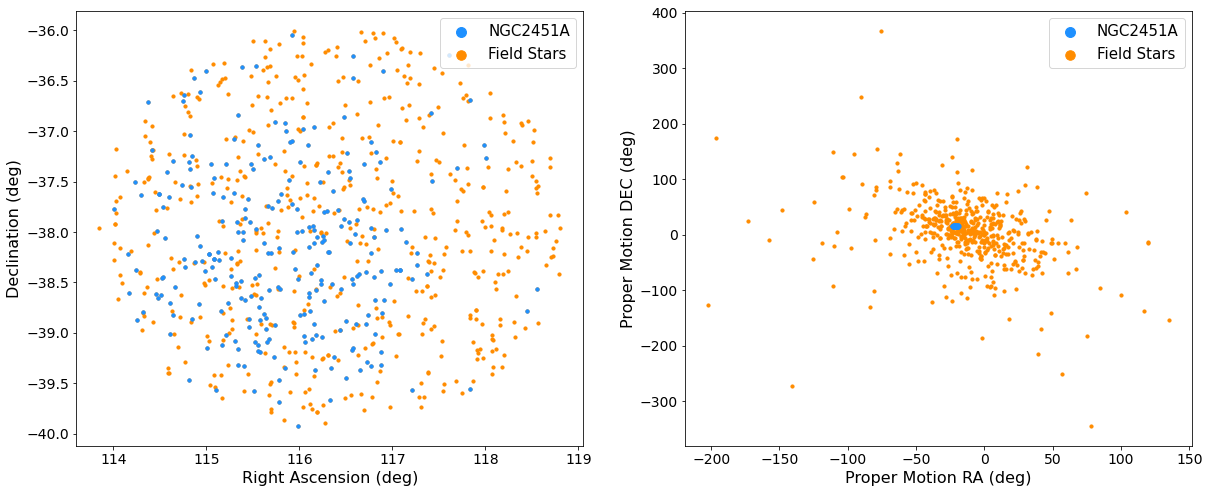

In [ ]:
GMMPlots(gaiaDataBin1, 'NGC2451A')

Cluster 0
Means: [116.30547175 -37.95415245  -6.51139376   5.15550544 310.87227887]
Standard Deviations: [ 1.25681628  1.01270302 16.58036905 23.95403346 56.03757365]
 
Cluster 1
Means: [116.10220397 -37.95938677  -9.69019672   4.714264   364.02948376]
Standard Deviations: [ 0.85534345  0.76737753  0.77028408  0.42319905 19.5426693 ]
 


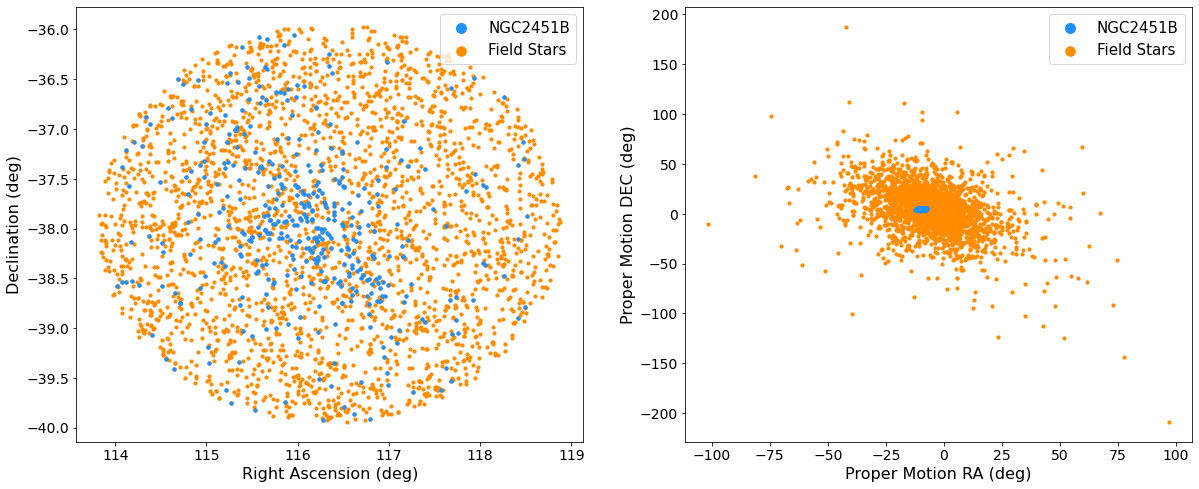

In [ ]:
GMMPlots(gaiaDataBin2, 'NGC2451B')

Cluster 0
Means: [ 1.18046408e+02 -3.85450589e+01 -2.44823554e+00  8.66236627e-01
  1.43104828e+03]
Standard Deviations: [ 0.21051555  0.1840535   0.18576978  0.20423145 76.84333778]
 
Cluster 1
Means: [ 116.36979078  -37.9542459    -2.81273173    3.85723589 1393.91261678]
Standard Deviations: [  1.2677378    1.00681713   3.50289641   4.79603233 113.59452185]
 


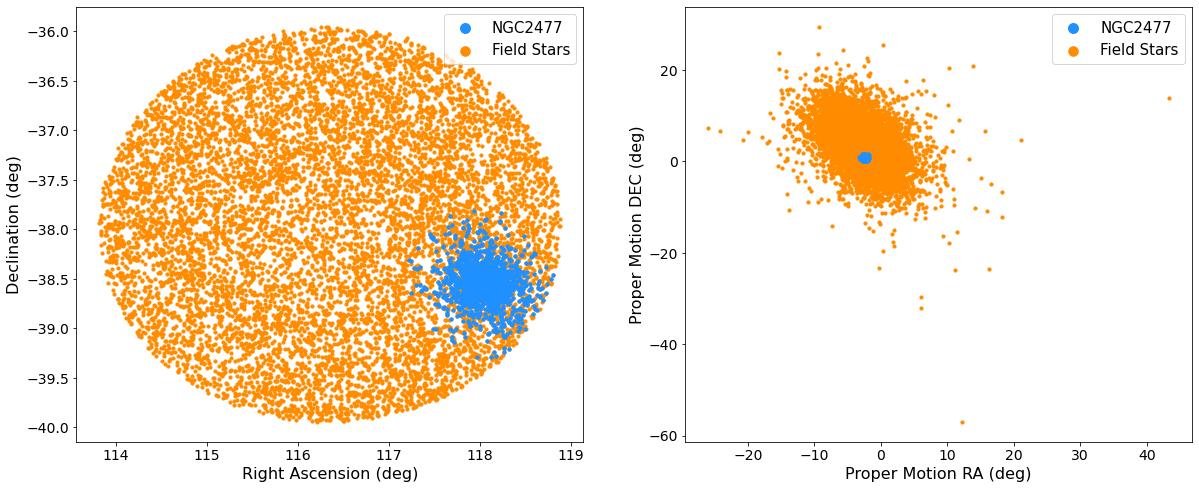

In [ ]:
GMMPlots(gaiaDataBin3, 'NGC2477')

# Part 3: Cluster colour magnitude diagrams


With knowledge of which stars are most likely to be members of the three star clusters in this field, you can now plot the colour-magnitude diagrams (CMD; $G_{BP} - G_{RP}$ vs $M_G$)  separately for the cluster and non-cluster stars. When determining the absolute G-band magnitude, $M_G$, for the cluster stars you can use the mean distance to the cluster as determined above.

In your write-up of this prac, you should compare the CMDs of the three clusters, explaining any differences seen. You should also compare the cluster CMDs to that of the field sample of stars, again explaining differences that you see. 

## **OLD**
plot the 3 clusters in a special colour over the field stars 

In [ ]:
allClusterDF= pd.concat([bin0_DF,bin250_DF,bin1250_DF], axis=0)
allClusterDF

Unnamed: 0            source_id        r_est         r_lo  \
143            155  5538853910140104064    89.095880    88.817244   
777            825  5538878473050578432   241.562371   238.956370   
1518          1611  5538869681258755968   186.032956   183.200255   
1768          1871  5538853600902466048   193.956944   192.767792   
2953          3130  5538875002713072896   237.722237   236.220738   
...            ...                  ...          ...          ...   
825334      856720  5537163617166686208  1467.955470  1412.280212   
825345      856731  5537161040186363264  1443.958892  1336.161130   
825429      856817  5537167053140575104  1362.814871  1315.152303   
825433      856821  5537172104021897216  1357.560733  1295.577391   
825492      856883  5537160490430548608  1284.707047  1250.110479   

               r_hi        r_len  result_flag  modality_flag          ra  \
143       89.376239  1707.256437            1              1  116.531273   
777      244.224803  1751.204694            1              1  118.275400   
1518     188.953021  1754.906879            1              1  118.105140   
1768     195.160593  1707.529720            1              1  116.547628   
2953     239.242602  1752.597890            1              1  118.260822   
...             ...          ...          ...            ...         ...   
825334  1528.111086  1573.199891            1              1  115.089818   
825345  1570.257562  1589.746702            1              1  115.287298   
825429  1413.992910  1594.172172            1              1  115.317610   
825433  1425.648883  1596.051014            1              1  115.274064   
825492  1321.235954  1584.171180            1              1  115.244228   

              dec  ...  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
143    -37.488423  ...        15.101034         16.365143         13.988963   
777    -38.306821  ...        15.838231         16.929142         14.802550   
1518   -38.499498  ...        15.767755         17.086060         14.624104   
1768   -37.530655  ...        11.143021         11.563253         10.592247   
2953   -38.356625  ...        10.248173         10.523552          9.849529   
...           ...  ...              ...               ...               ...   
825334 -39.038014  ...        15.114746         15.498325         14.561649   
825345 -39.080555  ...        16.470860         16.963339         15.827153   
825429 -39.035226  ...        14.908796         15.309022         14.336294   
825433 -38.878562  ...        15.652982         16.133898         15.009622   
825492 -39.123547  ...        14.119636         14.462625         13.616907   

        phot_g_mean_flux  phot_bp_mean_flux  phot_rp_mean_flux  \
143         1.717642e+04        3930.953880       20378.994059   
777         8.710718e+03        2338.290313        9632.696613   
1518        9.294897e+03        2023.633294       11353.406109   
1768        6.578669e+05      327532.016028      465445.783154   
2953        1.499951e+06      853364.470207      922478.631502   
...                  ...                ...                ...   
825334      1.696086e+04        8734.236453       12025.637768   
825345      4.864100e+03        2265.790145        3748.923731   
825429      2.050349e+04       10397.915940       14799.615369   
825433      1.033127e+04        4864.028110        7960.112166   
825492      4.241230e+04       22672.799478       28708.137510   

        phot_g_mean_flux_error  phot_bp_mean_flux_error  \
143                   6.906734                15.325081   
777                   4.905115                10.446617   
1518                  5.093545                 9.683291   
1768                904.339800              1207.602340   
2953                475.441037              1053.937862   
...                        ...                      ...   
825334                5.799426                16.794997   
825345                3.084536                 9.809

In [ ]:
allClusterDF.columns

Index(['Unnamed: 0', 'source_id', 'r_est', 'r_lo', 'r_hi', 'r_len',
       'result_flag', 'modality_flag', 'ra', 'dec', 'l', 'b', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'astrometric_chi2_al', 'astrometric_n_good_obs_al', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'phot_g_mean_flux',
       'phot_bp_mean_flux', 'phot_rp_mean_flux', 'phot_g_mean_flux_error',
       'phot_bp_mean_flux_error', 'phot_rp_mean_flux_error',
       'phot_bp_rp_excess_factor'],
      dtype='object')

In [ ]:
allClusterMag= allClusterDF['phot_bp_mean_mag'] - allClusterDF['phot_rp_mean_mag']
# clusterMag[:10]

Determining the absolute G-band magnitude: 
$$M= m - 5\times\log_{10}(\frac{d}{10})$$
Where d=`r_est`

In [ ]:
np.mean(allClusterDF['r_est'])

935.7267481908925

In [ ]:
allClusterDistance = allClusterDF['r_est']
allClusterAbsMag= allClusterDF['phot_g_mean_mag'] - 5*np.log10(allClusterDistance/10)

Doing the same for the field stars:

In [ ]:
fieldMag= cleanData['phot_bp_mean_mag'] - cleanData['phot_rp_mean_mag']
fieldDistance = np.mean(cleanData['r_est'])
fieldAbsMag= cleanData['phot_g_mean_mag'] - 5*np.log10(fieldDistance/10)

Plotting:

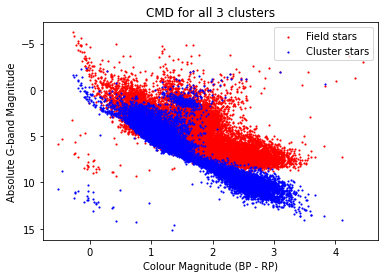

In [ ]:
plt.scatter(fieldMag, fieldAbsMag, marker='.',s=5,color='red',label= 'Field stars')
plt.scatter(allClusterMag, allClusterAbsMag, marker='.',s=5,color='blue', label='Cluster stars')

plt.xlabel('Colour Magnitude (BP - RP)')
plt.ylabel('Absolute G-band Magnitude')
plt.gca().invert_yaxis()
plt.title('CMD for all 3 clusters')
plt.legend()
plt.show()

Inspecting this plot, we can see there might be a correlation with the stars in these clusters. 



Checking using the mean distance 


Now let's do the same for the field stars and the stars in each specific cluster.

In [ ]:
def CMD_plottingFn(clusterDF,clusterName,distance, clusterFit_n, clusterComponent_n):
    clusterMag= clusterDF[clusterFit_n == clusterComponent_n]['phot_bp_mean_mag'] - clusterDF[clusterFit_n == clusterComponent_n]['phot_rp_mean_mag']
    clusterDistance = np.mean(clusterDF[clusterFit_n == clusterComponent_n]['r_est'])
    clusterAbsMag= clusterDF[clusterFit_n == clusterComponent_n]['phot_g_mean_mag'] - 5*np.log10(clusterDistance/10)
    
    #no need to include the field stars in this function as we've already done it above
    plt.scatter(fieldMag, fieldAbsMag, marker='.',s=5,color='red',alpha=0.05, label= 'Field stars')
    plt.scatter(clusterMag, clusterAbsMag, marker='.',s=5,color='blue', label=clusterName)

    plt.xlabel('Colour Magnitude (BP - RP)')
    plt.ylabel('Absolute G-band Magnitude')
    plt.gca().invert_yaxis()
    plt.title('CMD of ' + clusterName + ' and field stars up to '+distance+'pc')
    plt.legend()
    plt.show()
    return clusterMag, clusterAbsMag

In [ ]:
bin0_DF[clusterFit0 == clusterComponent0]['phot_g_mean_mag'].size

297

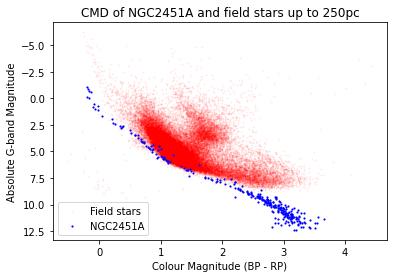

In [ ]:
NGC2451A_mag, NGC2451A_absMag  = CMD_plottingFn(bin0_DF,'NGC2451A','250',clusterFit0, clusterComponent0)


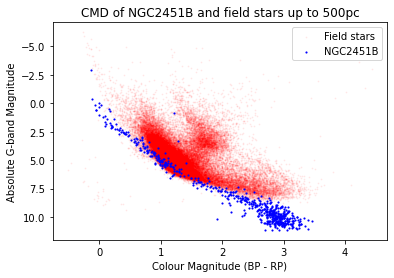

In [ ]:
NGC2451B_mag, NGC2451B_absMag = CMD_plottingFn(bin250_DF, 'NGC2451B','500',clusterFit250, clusterComponent250)

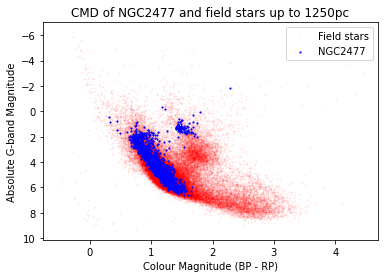

In [ ]:
NGC2477_mag, NGC2477_absMag  = CMD_plottingFn(bin1250_DF, 'NGC2477','1250', clusterFit1250, clusterComponent1250)

When I originally began to type up the code for this, I anticipated the shape to be the exact same as the plot that contained all 3 clusters. Although considering all 3 clusters individually have different shapes in the CMD plot, I believe we can conclude they contain different types of stars in comparison to each other. 

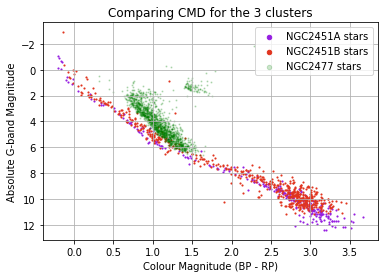

In [ ]:

#no need to include the field stars in this function as we've already done it above
plt.scatter(NGC2451A_mag, NGC2451A_absMag, marker='.',s=5,color='#961EE1', label='NGC2451A stars')
plt.scatter(NGC2451B_mag, NGC2451B_absMag, marker='.',s=5,color='#E1341E', label='NGC2451B stars')
plt.scatter(NGC2477_mag, NGC2477_absMag, marker='.',s=5,color='green',alpha=0.2, label='NGC2477 stars')



plt.xlabel('Colour Magnitude (BP - RP)')

plt.ylabel('Absolute G-band Magnitude')
plt.gca().invert_yaxis()
plt.title('Comparing CMD for the 3 clusters')
plt.legend(loc='best', markerscale=4)
plt.grid(True)
plt.savefig('comparing CMD for the 3 clusters')

plt.show()


now plotting all the field stars with the cluster stars in their own colours: 

In [ ]:
NGC2451A_absMag

7573       6.566178
7907      10.150396
16144      4.102249
20815      9.256572
31583      5.645229
            ...    
817960    10.590887
820515    11.674051
820566     4.472955
821559    10.537473
822723     8.804621
Name: phot_g_mean_mag, Length: 297, dtype: float64

In [ ]:
plt.legend?

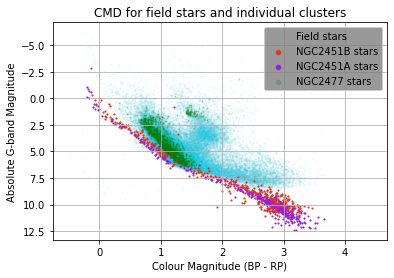

In [ ]:
plt.scatter(fieldMag, fieldAbsMag, marker='.',s=5,label= 'Field stars',alpha=0.05,c='#1ECBE1')
plt.scatter(NGC2451B_mag, NGC2451B_absMag, marker='.',s=5,color='#E1341E', label='NGC2451B stars')

plt.scatter(NGC2451A_mag, NGC2451A_absMag, marker='.',s=5,color='#961EE1', label='NGC2451A stars')
plt.scatter(NGC2477_mag, NGC2477_absMag, marker='.',s=5,color='green',alpha=0.2, label='NGC2477 stars')

plt.xlabel('Colour Magnitude (BP - RP)')
plt.ylabel('Absolute G-band Magnitude')
plt.gca().invert_yaxis()
plt.title('CMD for field stars and individual clusters')
plt.legend(loc='best', markerscale=4,facecolor='grey')
plt.grid(True) 
plt.savefig('CMD for field stars and individual clusters')
plt.show()

What kind of information can we get from this? 

* The furtherst cluster has stars with most similar magnitudes.
* cluster closest to us seems to have largest spread of magnitudes. 


## **HELP**

***Determining how many star members each cluster contains:***

In [ ]:
clusterStars['NGC2451A']

ra        dec       pmra      pmdec       r_est
716    116.697550 -37.327466 -21.226827  15.236985  197.940046
1378   116.537066 -37.399050 -20.761373  14.605334  193.357614
1796   116.543634 -37.463533 -21.172356  15.152574  189.751755
3413   115.302007 -37.617338 -20.445770  14.844999  196.198662
3442   115.410765 -37.771780 -20.904196  14.736104  191.139758
...           ...        ...        ...        ...         ...
48651  115.453542 -38.945969 -21.260657  15.877567  189.270454
48808  115.209500 -39.024404 -21.427217  16.519846  179.351956
48814  115.522978 -39.091863 -20.804307  16.597193  197.616557
48894  115.558562 -39.179438 -20.814572  15.129491  197.293169
48985  115.552772 -39.120461 -20.992150  15.321505  195.380892

[260 rows x 5 columns]

In [ ]:
clusterStars['NGC2451B']

ra        dec       pmra     pmdec       r_est
575    116.480014 -37.481434  -8.981199  4.881172  338.588888
710    118.055018 -38.367754 -11.061097  3.908291  357.849227
859    116.452513 -37.546650 -10.640906  4.441532  363.532109
903    116.455398 -37.527274  -9.633350  4.289770  358.641115
907    116.498903 -37.577507  -8.798389  4.445882  397.211751
...           ...        ...        ...       ...         ...
48419  116.153381 -37.916584  -9.515595  4.980213  373.387358
48428  116.593831 -37.881662  -9.787569  4.674814  378.005162
48636  115.399121 -39.025468 -10.202977  4.443881  382.394981
48677  115.498927 -39.078807 -10.828356  4.821677  313.500183
49082  115.370099 -38.770625  -8.776817  4.478926  386.798907

[429 rows x 5 columns]

In [ ]:
clusterStars['NGC2477']

ra        dec      pmra     pmdec        r_est
0      118.022089 -38.505155 -2.875924  1.097699  1534.891982
9      118.062996 -38.419294 -2.381590  0.701371  1466.966113
10     118.006950 -38.528421 -2.393903  0.817989  1487.369014
11     118.240593 -38.349574 -2.490391  1.161019  1367.054727
13     118.065353 -38.416903 -2.421378  1.082900  1534.038720
...           ...        ...       ...       ...          ...
40885  117.310437 -38.404248 -2.304414  1.039887  1373.957494
40908  117.345371 -38.381548 -2.490910  0.725840  1402.605477
40983  117.500830 -38.405978 -2.459423  0.695204  1531.797720
40987  117.592384 -38.169666 -2.343384  1.107194  1479.953365
41001  117.640497 -38.242963 -2.205187  1.155688  1405.246575

[1890 rows x 5 columns]

***Creating a function that calculates the colour magnitude and absolute G-band magnitude for each star, then plotting them to create a colour-magnitude diagram (CMD):***

In [ ]:
def colourMagDiagram(clusterName):
  # Selecting the cluster and field stars from the original filtered dataframe:
  clusterDF = gaiaExplore.iloc[clusterStars[clusterName].index.values.tolist()]
  fieldDF = gaiaExplore.iloc[fieldStars[clusterName].index.values.tolist()]

  # Calculating the colour magnitudes and absolute G-band magnitudes for the cluster stars:
  clusterCMag = clusterDF['phot_bp_mean_mag'] - clusterDF['phot_rp_mean_mag']
  clusterDist = np.mean(clusterDF['r_est'])
  clusterAbsMag = clusterDF['phot_g_mean_mag'] - 5*np.log10(0.1*clusterDist)

  # Calculating the colour magnitudes and absolute G-band magnitudes for the field stars:
  fieldCMag = fieldDF['phot_bp_mean_mag'] - fieldDF['phot_rp_mean_mag']
  fieldDist = np.mean(fieldDF['r_est'])
  fieldAbsMag = fieldDF['phot_g_mean_mag'] - 5*np.log10(0.1*fieldDist)

  # Plotting the absolute G-band magnitudes against the colour magnitudes:
  plt.figure(figsize=(10,8))
  plt.scatter(clusterCMag, clusterAbsMag, marker='o', s=10, color='dodgerblue', label=clusterName, zorder=10)
  plt.scatter(fieldCMag, fieldAbsMag, marker='o', s=10, color='darkorange',label='Field Stars')
  plt.xlabel('Colour Magnitude (BP - RP)', fontsize=16)
  plt.xticks(fontsize=14)
  plt.ylabel('Absolute G-Band Magnitude', fontsize=16)
  plt.yticks(fontsize=14)
  plt.gca().invert_yaxis()
  plt.legend(loc=1, markerscale=3, prop={'size': 15})

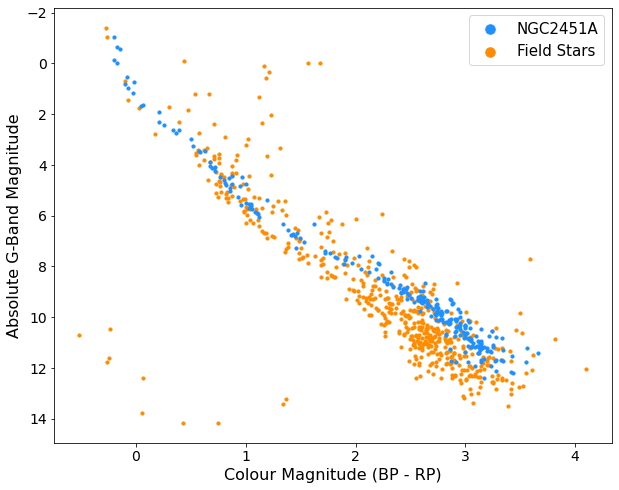

In [ ]:
colourMagDiagram('NGC2451A')

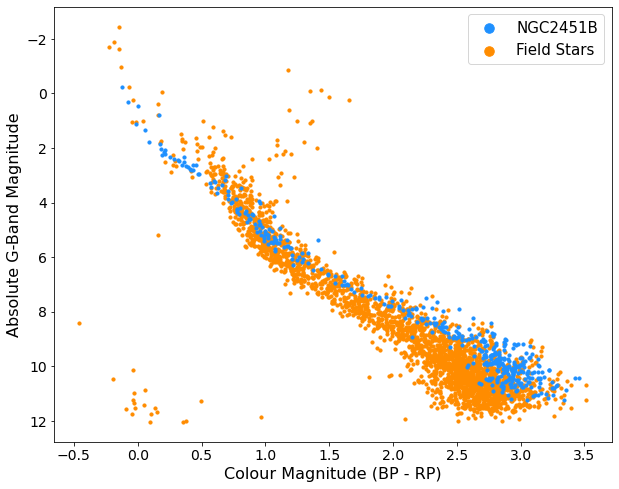

In [ ]:
colourMagDiagram('NGC2451B')

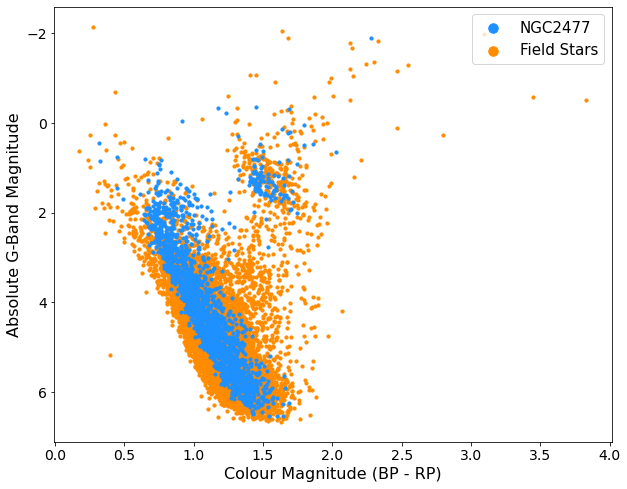

In [ ]:
colourMagDiagram('NGC2477')

***The similarities and differences in these plots will be covered in the report.***